In [ ]:
### Download using my pretrained script. 

### Testing GoEmotions Model w/ Examples

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import os

sys.path.append('../')

In [ ]:
from emotion_models import BertForMultiLabelClassification
from transformers import AutoTokenizer, AutoConfig
import torch

#### Code

In [ ]:
def predict(sentence, emo_model, emo_tokenizer, threshold=0.3, verbose=True):
    inputs = emo_tokenizer(sentence, return_tensors='pt')

    with torch.no_grad():
        outputs = emo_model(**inputs)
        probs = outputs[0].float().sigmoid().numpy().squeeze()
        probs_threshed = (probs>threshold).squeeze()
        emotions = [emo_model.config.id2label[idd] for idd in np.where(probs_threshed)[0]]
    if verbose:
        print(emotions)
    return(probs, probs_threshed, emotions)

In [ ]:
def plot_prediction(sentence, probs, labels, threshold=0.3):
    plt.figure(figsize=(12,4))
    plt.suptitle(sentence)
    plt.ylabel('probabilities')
    x = np.arange(len(labels))
    y = probs
    plt.bar(x, y)
    plt.xticks(x, labels, rotation=90);
    plt.axhline(y=threshold, linestyle='--', color='k')
    sns.despine()

#### Load Model

In [ ]:
model_path = '../models/pretrained/monologg-bert-base-cased-goemotions-original/'
emo_model = BertForMultiLabelClassification.from_pretrained(model_path)
emo_tokenizer = AutoTokenizer.from_pretrained(model_path)
emo_labels = [emo_model.config.id2label[i] for i in range(28)]

In [ ]:
#emo_labels

#### Manual Examples

In [ ]:
sentence = 'I am very sad.'
probs, probs_threshed, emotions = predict(sentence, emo_model, emo_tokenizer)
plot_prediction(sentence, probs, emo_labels, threshold=0.3)

In [ ]:
sentence = 'It was a difficult day.'
probs, probs_threshed, emotions = predict(sentence, emo_model, emo_tokenizer)
plot_prediction(sentence, probs, emo_labels, threshold=0.3)

In [ ]:
sentence = 'My cat died.'
probs, probs_threshed, emotions = predict(sentence, emo_model, emo_tokenizer)
plot_prediction(sentence, probs, emo_labels, threshold=0.3)

In [ ]:
sentence = 'Was there any point to that at all?'
probs, probs_threshed, emotions = predict(sentence, emo_model, emo_tokenizer)
plot_prediction(sentence, probs, emo_labels, threshold=0.3)

In [ ]:
sentence = 'We slaughtered that team!'
probs, probs_threshed, emotions = predict(sentence, emo_model, emo_tokenizer)
plot_prediction(sentence, probs, emo_labels, threshold=0.3)

In [ ]:
sentence = 'How many times do I have to tell you no! That is not how you do it!'
probs, probs_threshed, emotions = predict(sentence, emo_model, emo_tokenizer)
plot_prediction(sentence, probs, emo_labels, threshold=0.3)

In [ ]:
sentence = 'If I go to the doctor, I might feel sick.'
probs, probs_threshed, emotions = predict(sentence, emo_model, emo_tokenizer)
plot_prediction(sentence, probs, emo_labels, threshold=0.3)

In [ ]:
sentence = 'I feel sick and about to throw up.'
probs, probs_threshed, emotions = predict(sentence, emo_model, emo_tokenizer)
plot_prediction(sentence, probs, emo_labels, threshold=0.3)

In [ ]:
sentence = 'I might have to get surgery and I am worried it wont go well.'
probs, probs_threshed, emotions = predict(sentence, emo_model, emo_tokenizer)
plot_prediction(sentence, probs, emo_labels, threshold=0.3)

In [ ]:
'anger'; 'annoyance'; 
'disappointment'; 
'disgust';
'fear'; 'nervousness'
'grief'; 'sadness'


In [ ]:
emo_labels

#### Sentence Dataset

In [298]:
score_df = pd.read_csv('../data/results/single_sentences_IYou_3_emo/emotion_df.csv', index_col=0)
print(len(score_df))
score_df.head()

73566


full  \
0  I walked my dog to the park. I need surgery. I...   
1  You made dinner. You need to study hard. You w...   
2  I might fail the test. I walked my dog to the ...   
3  I made dinner. I walked my dog to the park. I ...   
4  I have a math test. I need surgery. I ate brea...   

                                                 end  sentiment  admiration  \
0  People on the Internet are too stupid for me. ...     -0.979    0.000662   
1  You have a paper class and your paper is this ...     -0.978    0.000394   
2             I feel like the exam sucks. r=-0.978\n     -0.978    0.000898   
3       My dog food is so bad! Oh my God. r=-0.978\n     -0.978    0.002958   
4       This is the worst part of my day. r=-0.978\n     -0.978    0.002993   

   amusement     anger  annoyance  approval    caring  confusion  ...  \
0   0.001533  0.032144   0.995375  0.001306  0.000801   0.001379  ...   
1   0.000428  0.974377   0.359014  0.001300  0.002615   0.000496  ...   
2   0.001027  0.007037   0.991355  0.001499  0.000672   0.001441  ...   
3   0.000739  0.004440   0.005693  0.001225  0.000777   0.002665  ...   
4   0.003847  0.017178   0.036492  0.001774  0.003009   0.001534  ...   

       love  nervousness  optimism     pride  realization    relief   remorse  \
0  0.000375     0.000674  0.001453  0.001614     0.004982  0.003289  0.000733   
1  0.000639     0.000336  0.000560  0.000503     0.001383  0.000255  0.001245   
2  0.000404     0.006202  0.003179  0.002709     0.005312  0.003698  0.000372   
3  0.001113     0.003345  0.000621  0.000652     0.002050  0.003304  0.004056   
4  0.003986     0.002159  0.002832  0.000972     0.004803  0.002935  0.003461   

    sadness  surprise   neutral  
0  0.002617  0.001358  0.002655  
1  0.009404  0.001128  0.014943  
2  0.006117  0.001725  0.010255  
3  0.315426  0.013828  0.005102  
4  0.289493  0.001257  0.002102  

[5 rows x 31 columns]

##### Correlating Negative Emotions with Sentiment

In [299]:
neg_emotions = ['anger', 'annoyance', 'disappointment', 'disapproval',
                'disgust', 'fear', 'nervousness','grief', 'sadness','remorse']

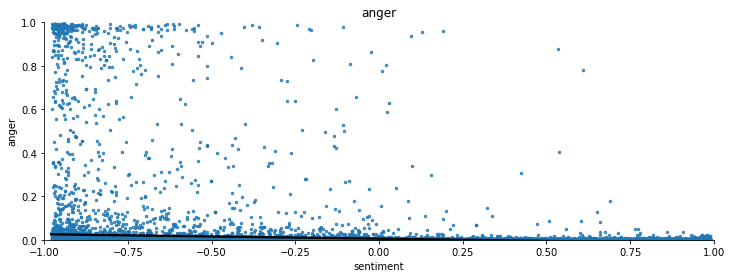

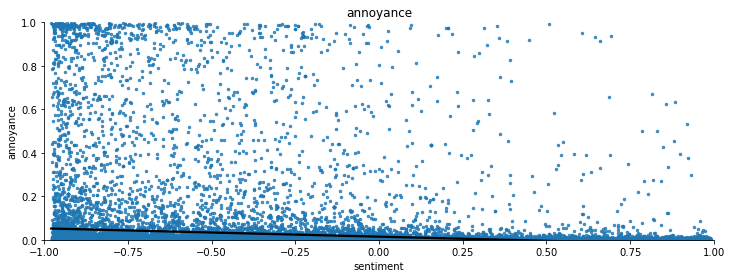

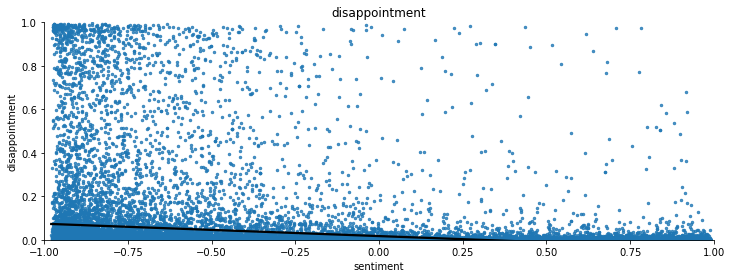

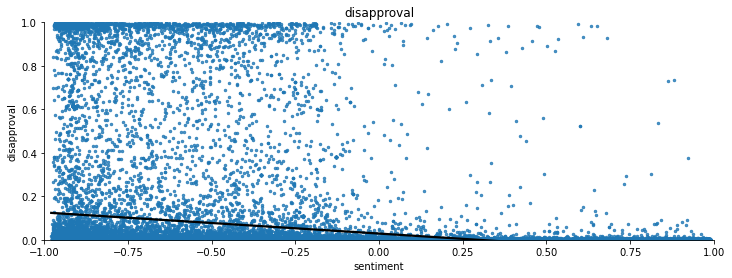

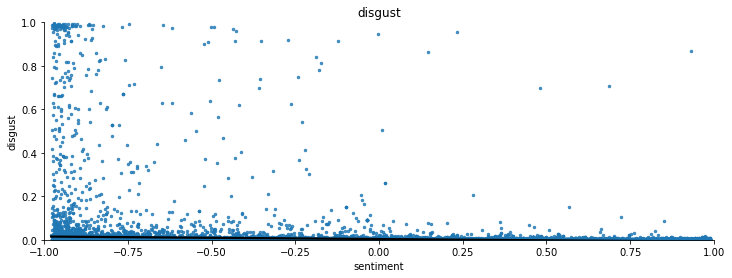

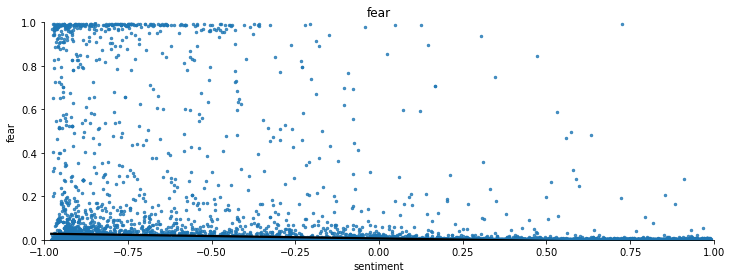

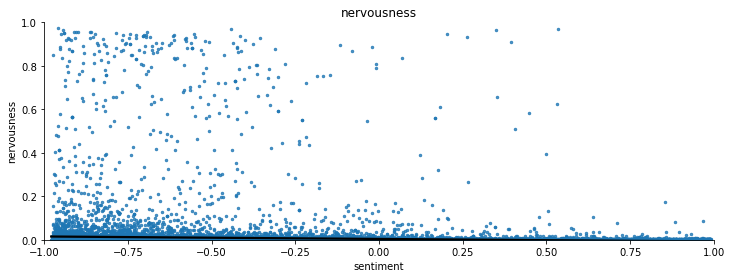

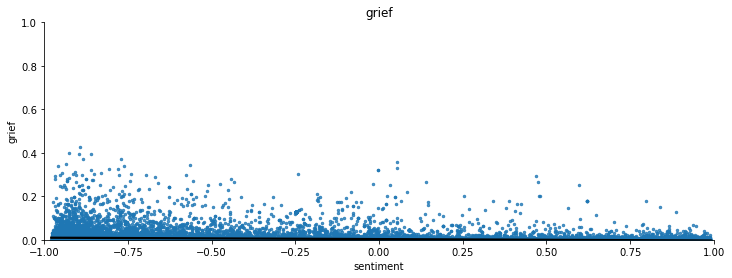

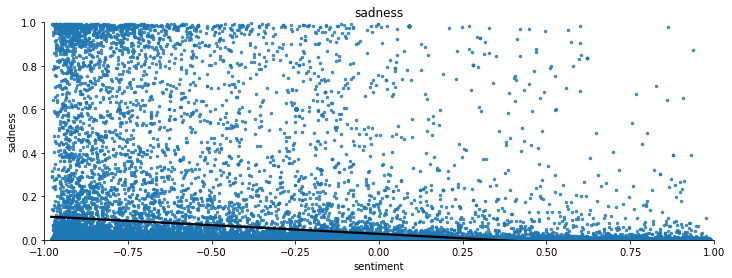

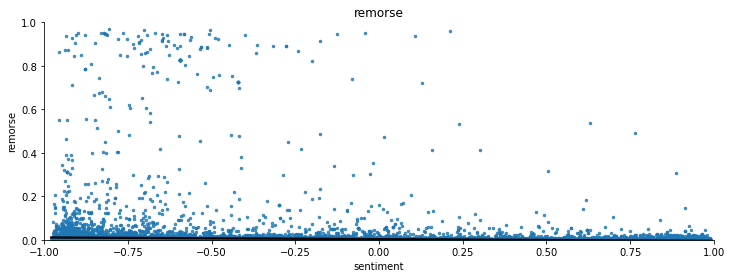

In [300]:
for emotion in neg_emotions:
    
    plt.figure(figsize=(12,4))
    plt.title(emotion)
    plt.ylabel(emotion)
    plt.xlabel('sentiment')
    plt.xlim([-1,1])
    plt.ylim([0,1])
    sns.regplot(x='sentiment', y=emotion, scatter_kws={'s': 6}, 
                line_kws={'color':'k'}, data=score_df)
    sns.despine()

##### Correlating Positive Emotions with Sentiment

In [301]:
pos_emotions = ['admiration','amusement','approval',
 'caring','desire','excitement','gratitude', 'joy','love','optimism',
 'pride','relief']

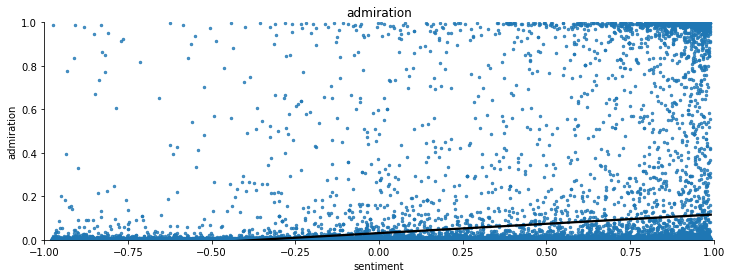

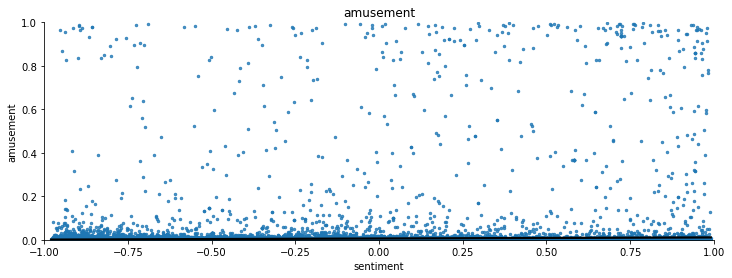

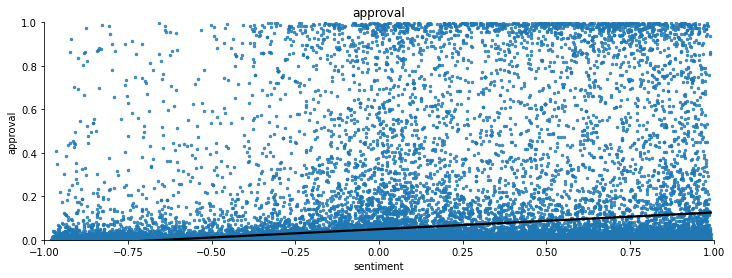

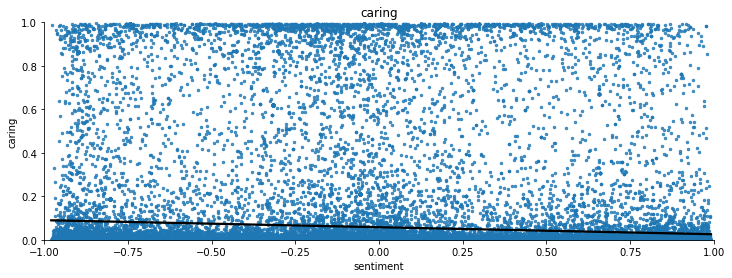

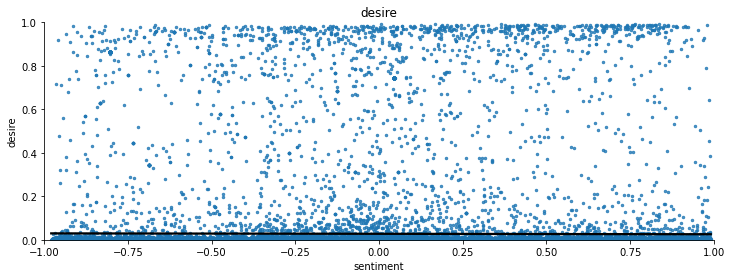

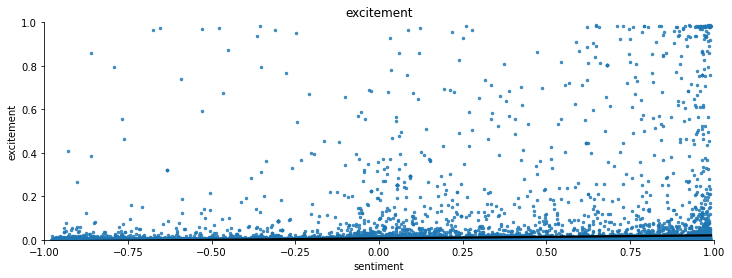

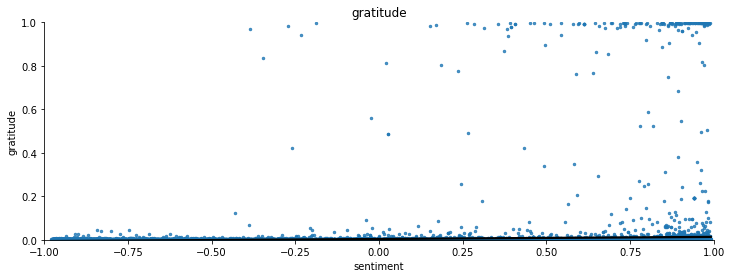

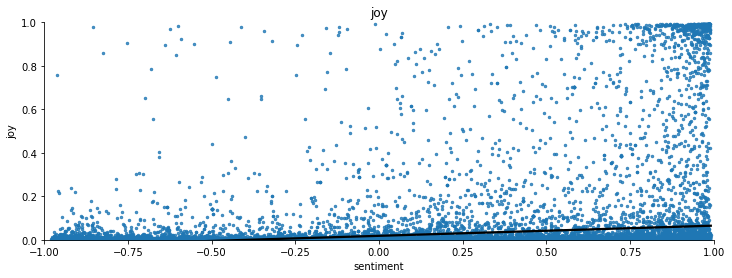

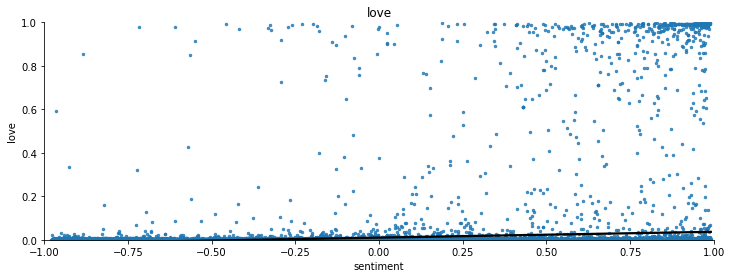

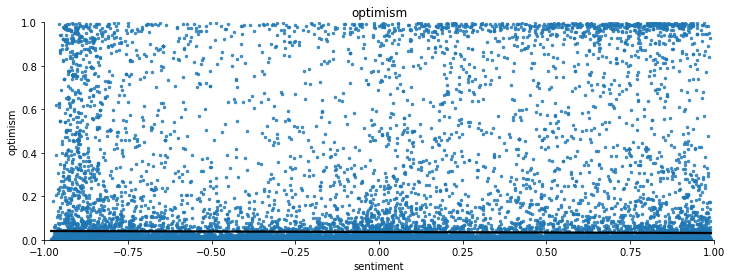

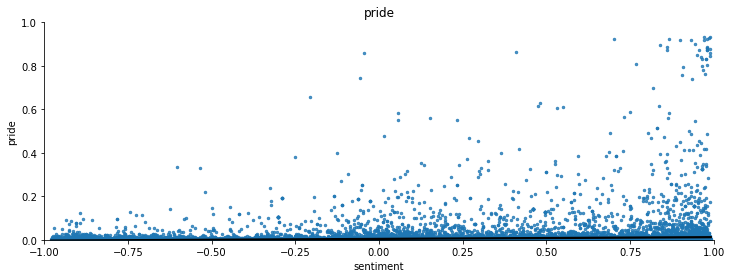

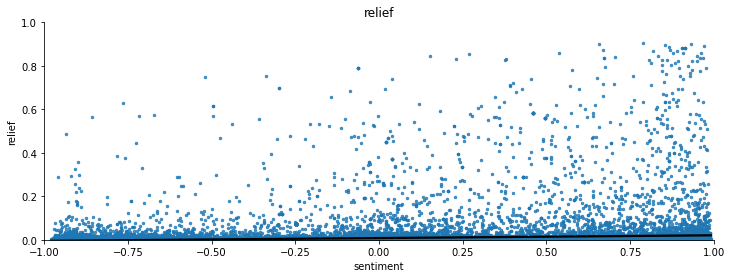

In [302]:
for emotion in pos_emotions:
    plt.figure(figsize=(12,4))
    plt.title(emotion)
    plt.ylabel(emotion)
    plt.xlabel('sentiment')
    plt.xlim([-1,1])
    plt.ylim([0,1])
    sns.regplot(x='sentiment', y=emotion, scatter_kws={'s': 6}, 
                line_kws={'color':'k'}, data=score_df)
    sns.despine()

##### Top Examples: Negative

In [303]:
%%capture cap --no-stderr

top = 10
for emotion in neg_emotions:
    df_sorted = score_df.sort_values(by=emotion, ascending=False)
    scores = df_sorted[emotion].values
    texts = df_sorted['end'].values
    top_texts = [t.split('r=')[0] for t in texts[0:top]]
    
    print(emotion)
    print('---')
    for text in top_texts:
        print(text)
    print(scores[0:top])
    print(' ')

In [304]:
with open('../data/results/single_sentences_IYou_3_emo/neg_emotion_examples.txt','w') as f:
    f.write(cap.stdout)

In [305]:
cap.show()

anger
---
I was restless, bored, drunk, impatient, and angry all at the same time. 
It's a fucking test, William. 
F*** you, dad, shut the f**k up. 
Seriously, I want to shut the fuck up. 
I was feeling angry and bored. 
Fucking breakfast. 
You're keeping an eye on that bloody car. 
But I'm a fucking psychologist. 
I am going to fuck up. 
If they don't respond to my demands, I'll fuck the fuck out of them. 
[0.9951089  0.9933252  0.99309325 0.9930783  0.99292254 0.99240583
 0.99225885 0.9922511  0.99222034 0.9918908 ]
 
annoyance
---
You call me the same crap on the phone all the time. 
I was somewhat annoyed, but I decided to do something about it. 
You wrote that annoying note I sent you. 
Bunch of brown. 
People were finding the football section of Apple Music has become just as annoying as their phones. 
They're annoying. 
You're annoying. 
A breakfast is always the least frustrating part. 
This is just tawdry bullshit. 
And that feels totally frustrating. 
[0.9968444  0.99654645 0

##### Top Examples: Positive

In [306]:
%%capture cap --no-stderr

top = 10
for emotion in pos_emotions:
    df_sorted = score_df.sort_values(by=emotion, ascending=False)
    scores = df_sorted[emotion].values
    texts = df_sorted['end'].values
    top_texts = [t.split('r=')[0] for t in texts[0:top]]
    
    print(emotion)
    print('---')
    for text in top_texts:
        print(text)
    print(scores[0:top])
    print(' ')

In [307]:
with open('../data/results/single_sentences_IYou_3_emo/pos_emotion_examples.txt','w') as f:
    f.write(cap.stdout)

In [308]:
cap.show()

admiration
---
Success! You have overcome the workout/workout blues. 
Exercise and exercise are good. 
I need nothing more than a report card, a diploma, and a good job. 
Your teeth are good. 
My mother cooked the perfect Italian dinner. 
Despite all these fine qualities, you have a wonderful personality and are a remarkable caretaker. 
You chose the room with the best view. 
The exercise was great, but the ants ate you. 
You made this the most satisfying and inspirational and friendly and wonderful life. 
Your cholesterol level was good. 
[0.9984276  0.99835795 0.9983316  0.9982576  0.9982559  0.99824595
 0.9981907  0.9981831  0.9981376  0.99812645]
 
amusement
---
I think the funniest thing is that both of those things happened. 
The funny thing about that test is that at Yale we never fail. 
Hahahaha! I guess this is why I got a haircut. 
I watched with amusement as you combed your nails. 
And the real funny part was this, Korkie says. 
I laugh at the bank robbers. 
I laughed at som

##### Emotion Counts: Negative

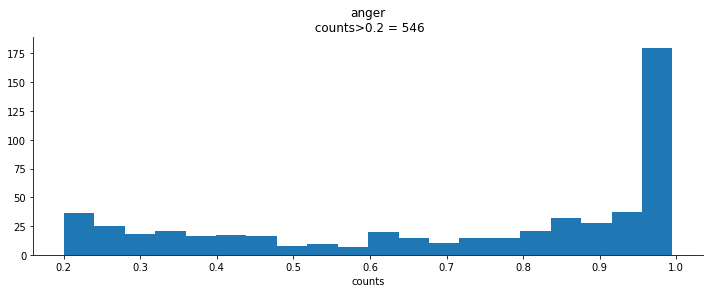

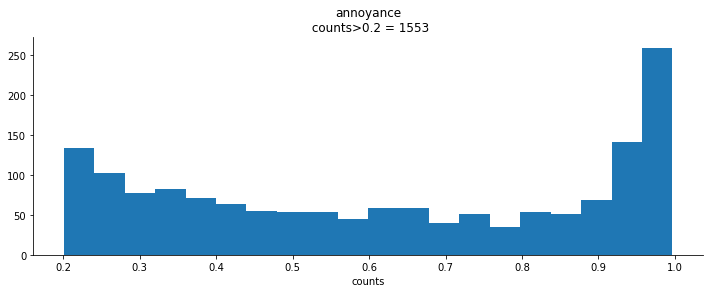

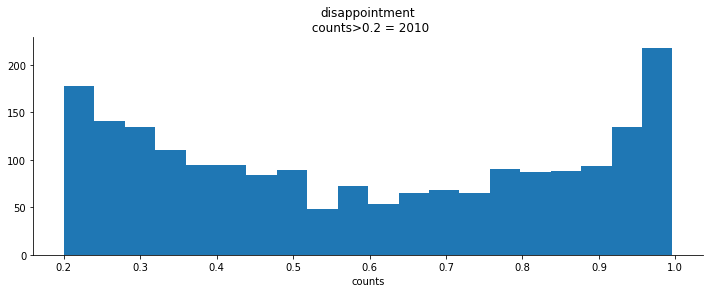

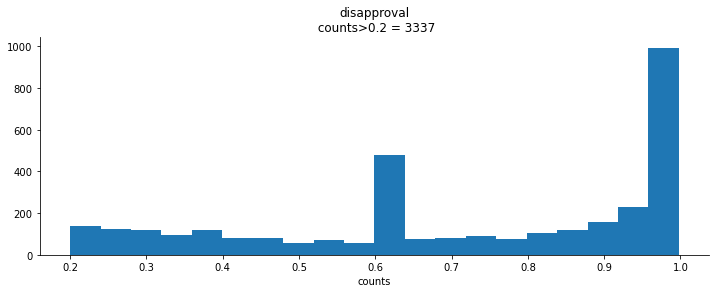

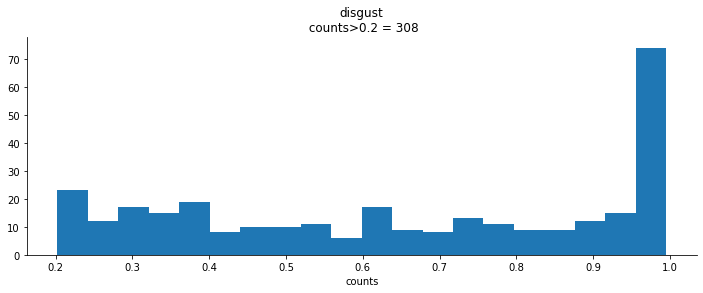

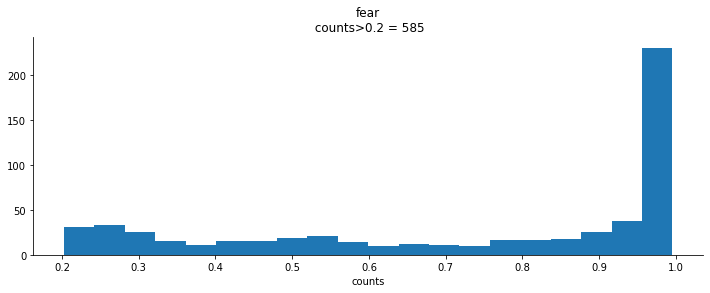

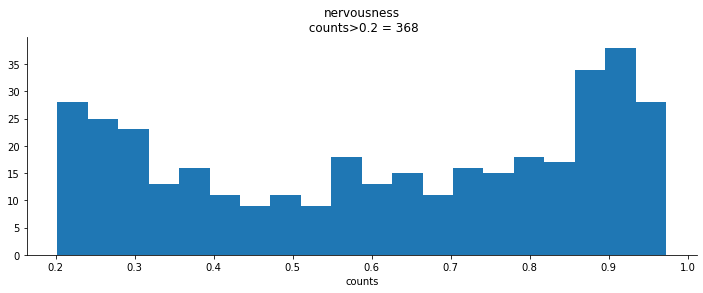

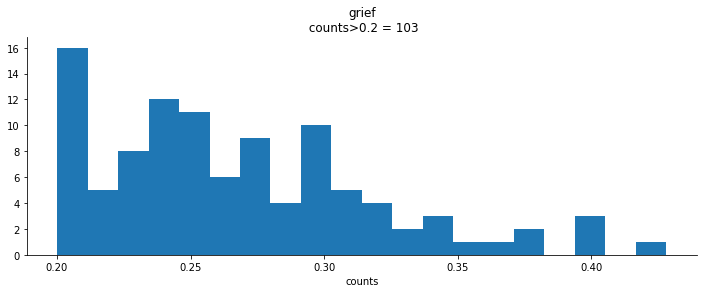

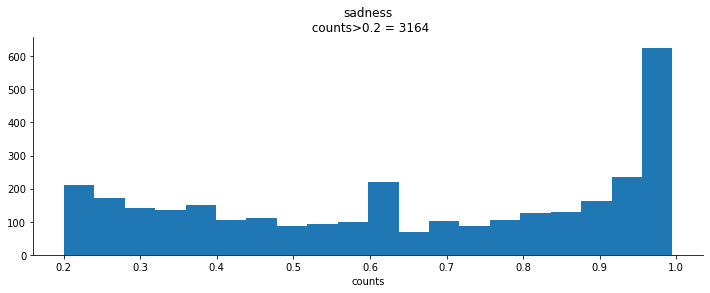

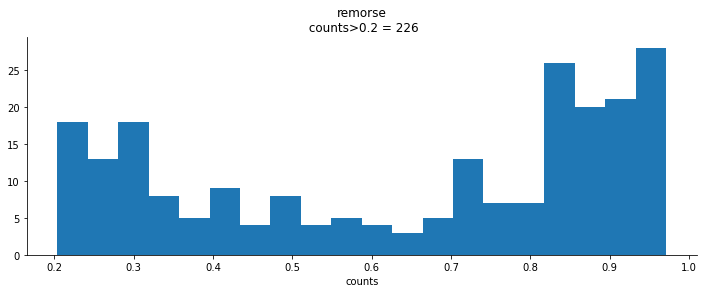

In [309]:
for emotion in neg_emotions:
    
    scores = score_df[emotion].values
    scores = scores[scores>0.2]

    plt.figure(figsize=(12,4))
    plt.title(emotion + '\n counts>0.2 = '+str(len(scores)))
    plt.xlabel('counts')
    #plt.xlim([0.2,1])

    plt.hist(scores,bins=20)
    sns.despine()

##### Emotion Counts: Positive

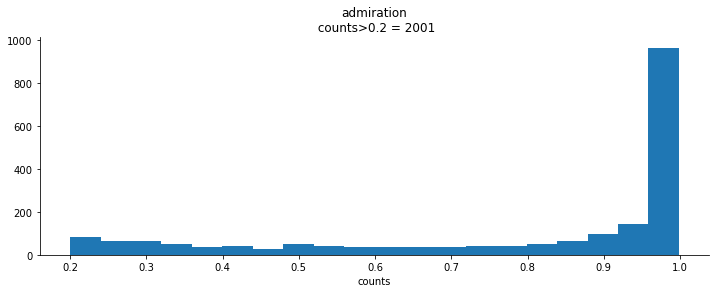

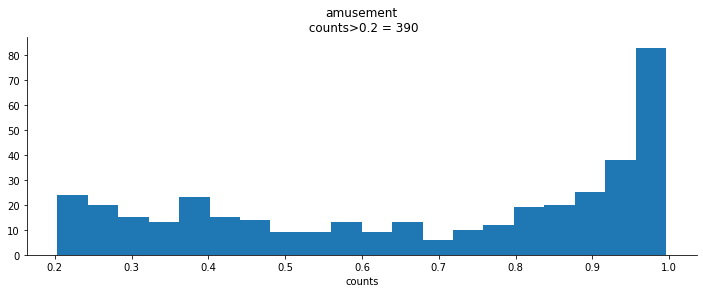

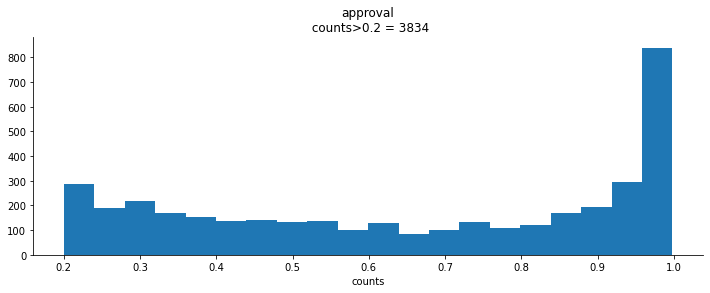

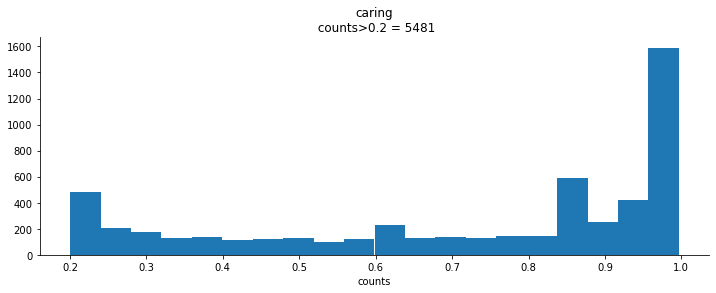

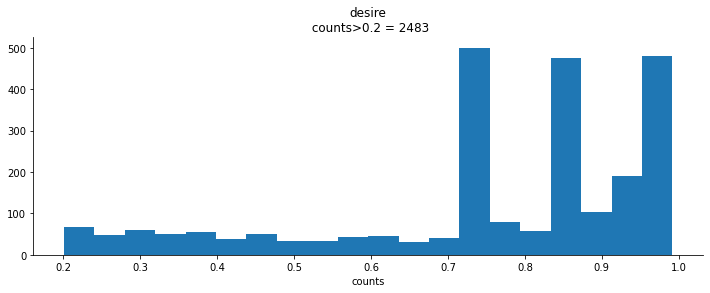

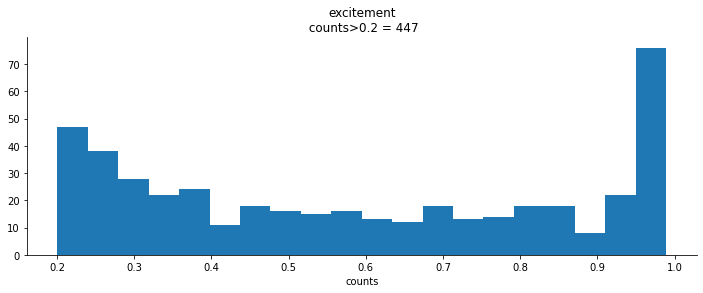

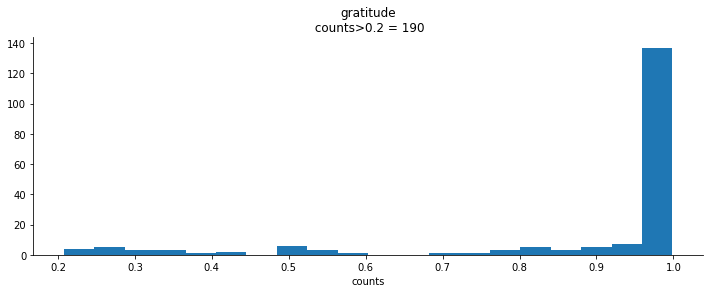

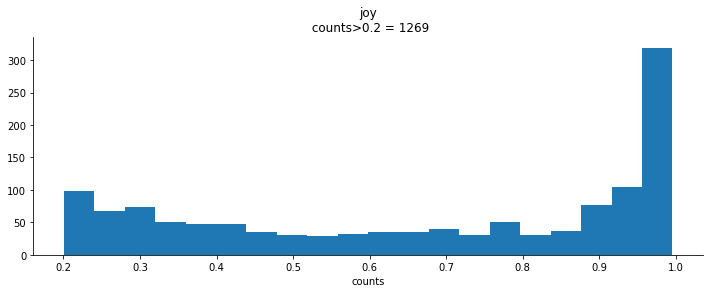

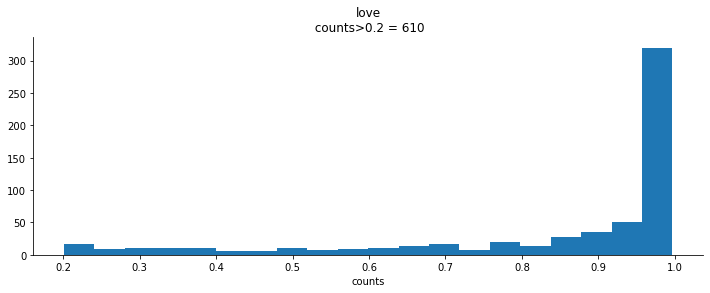

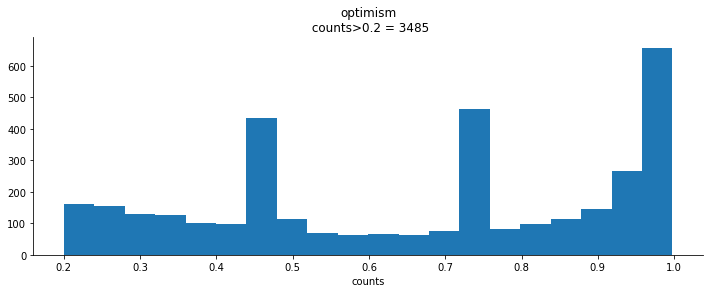

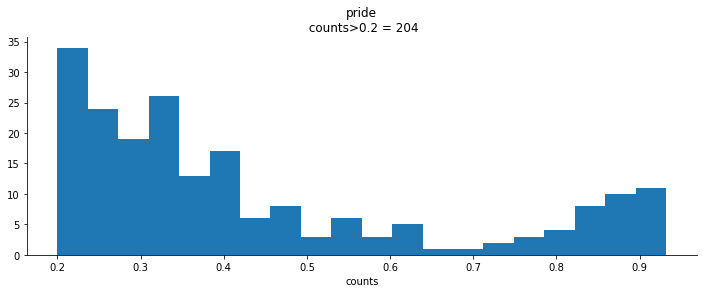

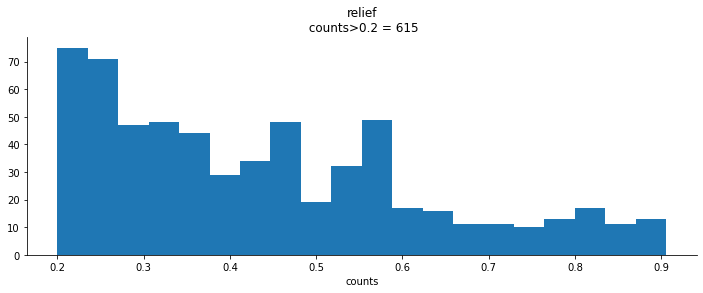

In [310]:
for emotion in pos_emotions:
    
    scores = score_df[emotion].values
    scores = scores[scores>0.2]

    plt.figure(figsize=(12,4))
    plt.title(emotion + '\n counts>0.2 = '+str(len(scores)))
    plt.xlabel('counts')
    #plt.xlim([0.2,1])

    plt.hist(scores,bins=20)
    sns.despine()

##### Sentiment Distribution

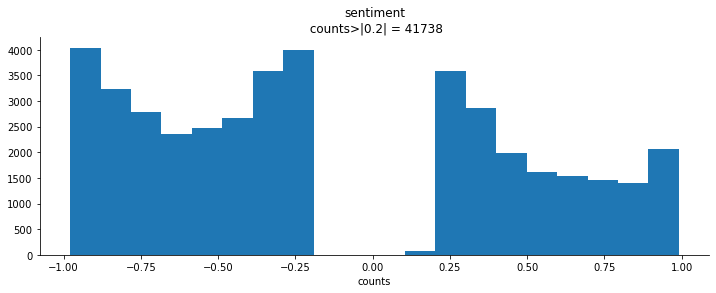

In [311]:
scores = score_df['sentiment'].values
scores = scores[np.abs(scores)>0.2]

plt.figure(figsize=(12,4))
plt.title('sentiment' + '\n counts>|0.2| = '+str(len(scores)))
plt.xlabel('counts')
#plt.xlim([0.2,1])

plt.hist(scores,bins=20)
sns.despine()

#### Go Emotions Dataset

In [312]:
score_df = pd.read_csv('../data/results/single_sentences_IYou_3_emo/go_emotion_df.csv', index_col=0)
print(len(score_df))
score_df.head()

52965


full  \
0  My favourite food is anything I didn't have to...   
1  Now if he does off himself, everyone will thin...   
2          WHY THE FUCK IS BAYLESS ISOING. r=-0.91\n   
3             To make her feel threatened. r=-0.68\n   
4                  Dirty Southern Wankers. r=-0.84\n   

                                                 end  sentiment  admiration  \
0  My favourite food is anything I didn't have to...       0.93    0.000291   
1  Now if he does off himself, everyone will thin...      -0.78    0.000241   
2          WHY THE FUCK IS BAYLESS ISOING. r=-0.91\n      -0.91    0.003007   
3             To make her feel threatened. r=-0.68\n      -0.68    0.001657   
4                  Dirty Southern Wankers. r=-0.84\n      -0.84    0.002145   

   amusement     anger  annoyance  approval    caring  confusion  ...  \
0   0.000649  0.000456   0.001708  0.001112  0.000575   0.000376  ...   
1   0.002470  0.000239   0.001511  0.000913  0.000263   0.000468  ...   
2   0.000301  0.986034   0.012101  0.000664  0.000712   0.001533  ...   
3   0.000843  0.000864   0.001451  0.001271  0.014837   0.003317  ...   
4   0.001882  0.006127   0.995474  0.004614  0.000749   0.000922  ...   

       love  nervousness  optimism     pride  realization    relief   remorse  \
0  0.000898     0.000087  0.000660  0.000181     0.000461  0.000120  0.000142   
1  0.000096     0.000072  0.002516  0.000216     0.000778  0.000197  0.000179   
2  0.001738     0.000124  0.000998  0.001091     0.001670  0.000131  0.001057   
3  0.000503     0.054697  0.004122  0.000364     0.001240  0.000542  0.000573   
4  0.000207     0.000335  0.004176  0.001209     0.002228  0.001700  0.000307   

    sadness  surprise   neutral  
0  0.000423  0.000103  0.999059  
1  0.000368  0.000465  0.998842  
2  0.001121  0.004092  0.034706  
3  0.003721  0.001853  0.017065  
4  0.000810  0.000626  0.016573  

[5 rows x 31 columns]

##### Correlating Negative Emotions with Sentiment

In [313]:
neg_emotions = ['anger', 'annoyance', 'disappointment', 'disapproval',
                'disgust', 'fear', 'nervousness','grief', 'sadness','remorse']

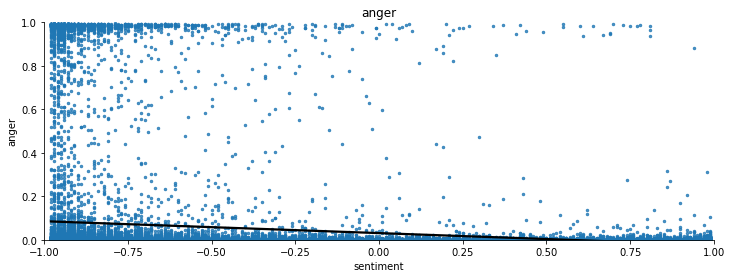

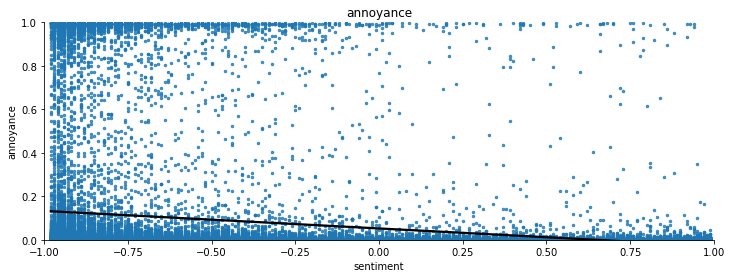

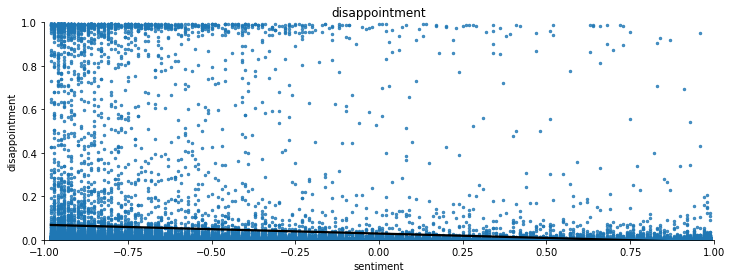

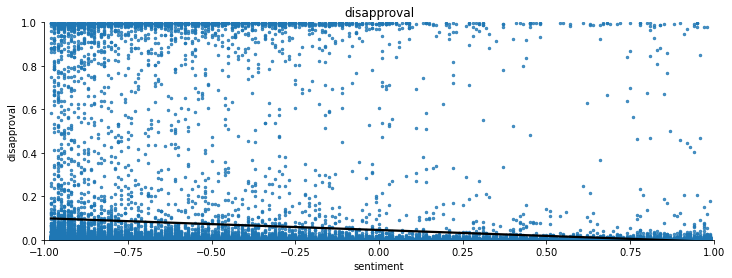

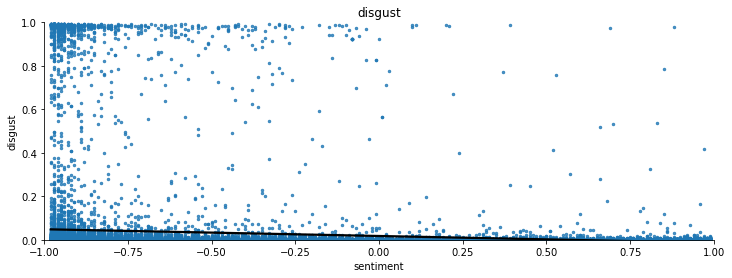

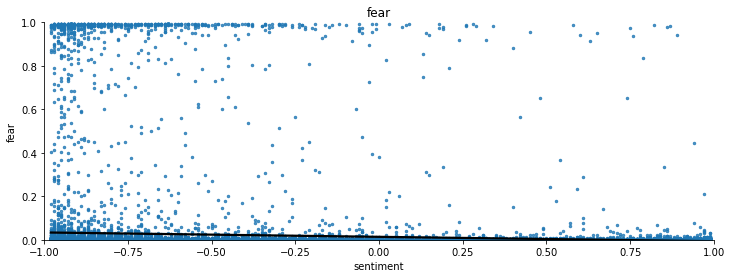

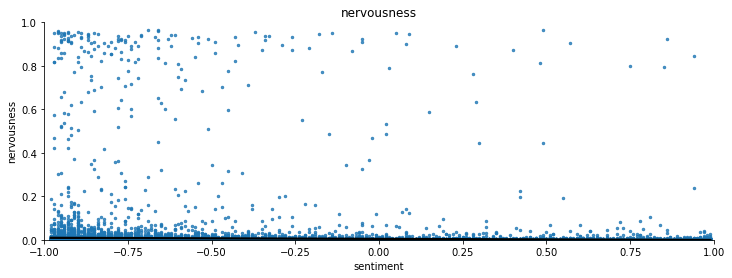

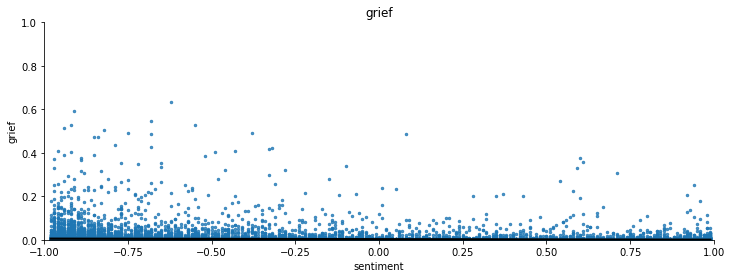

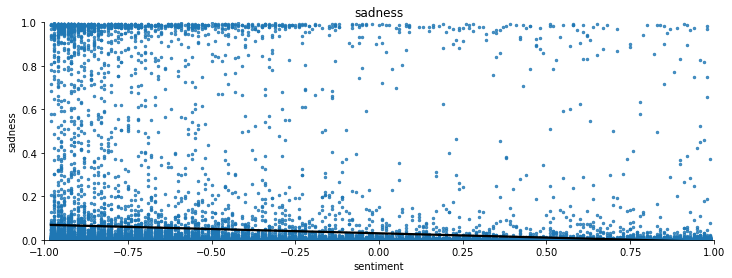

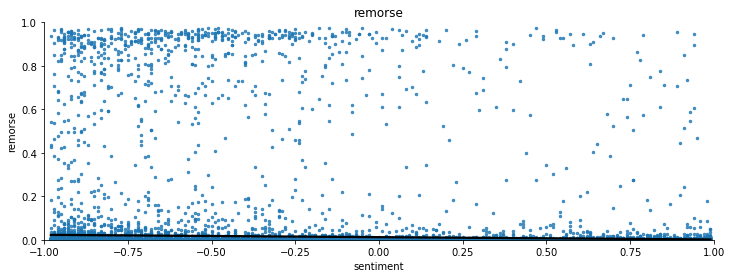

In [314]:
for emotion in neg_emotions:
    
    plt.figure(figsize=(12,4))
    plt.title(emotion)
    plt.ylabel(emotion)
    plt.xlabel('sentiment')
    plt.xlim([-1,1])
    plt.ylim([0,1])
    sns.regplot(x='sentiment', y=emotion, scatter_kws={'s': 6}, 
                line_kws={'color':'k'}, data=score_df)
    sns.despine()

##### Correlating Positive Emotions with Sentiment

In [315]:
pos_emotions = ['admiration','amusement','approval',
 'caring','desire','excitement','gratitude', 'joy','love','optimism',
 'pride','relief']

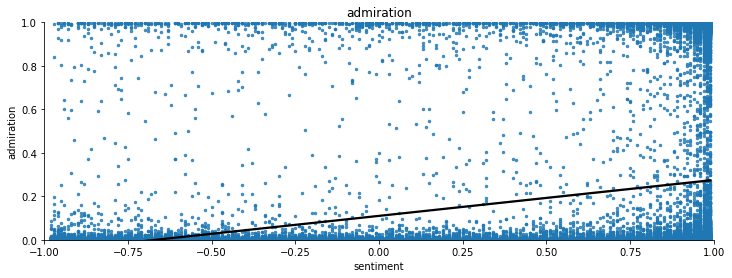

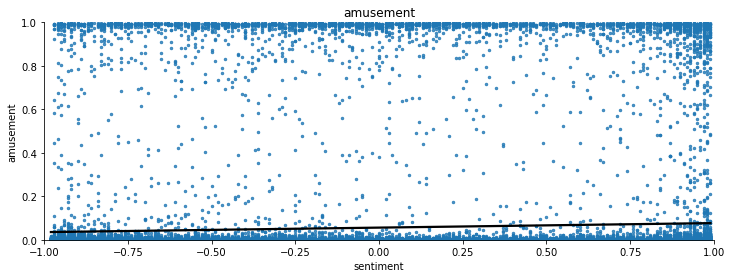

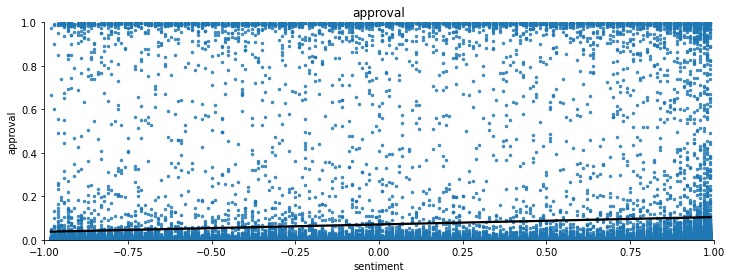

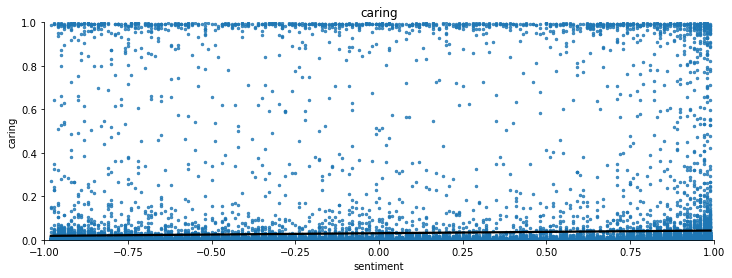

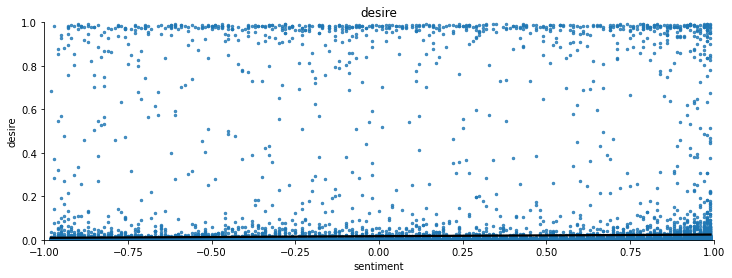

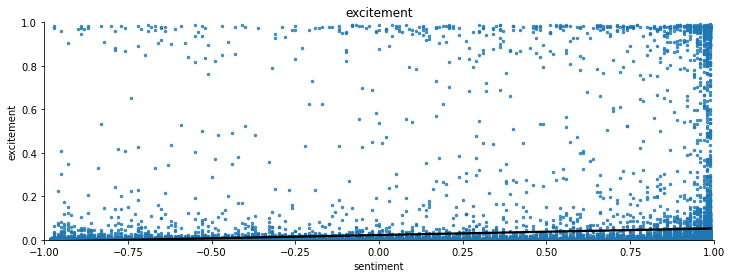

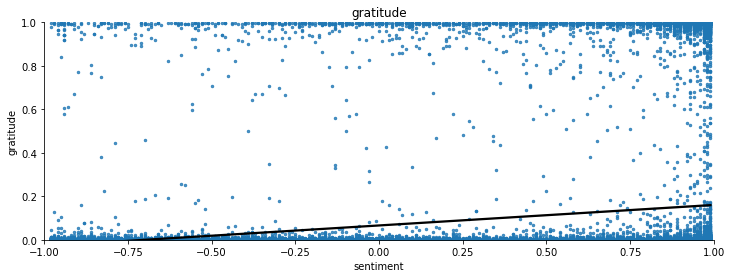

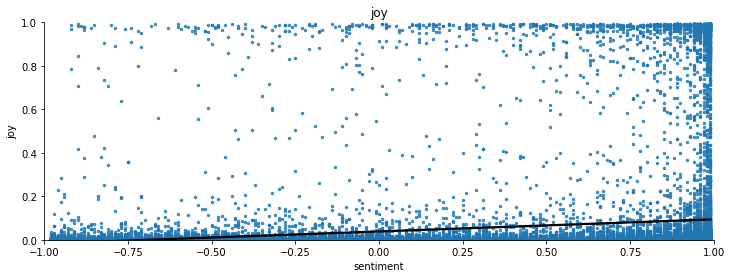

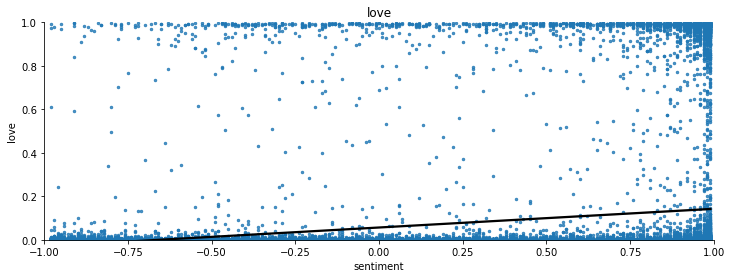

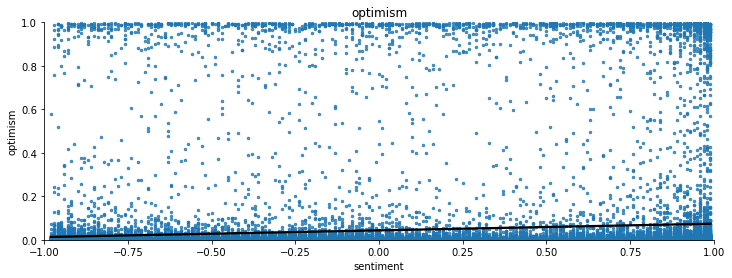

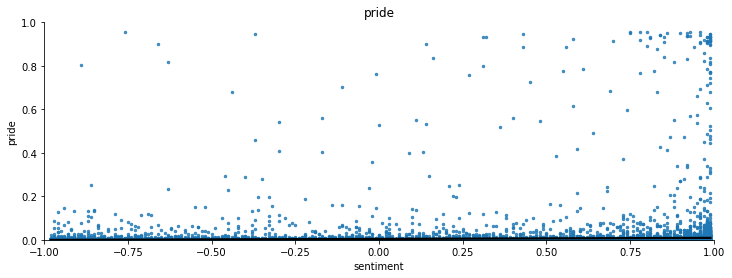

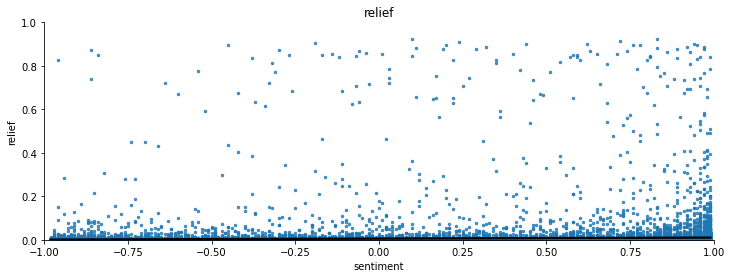

In [316]:
for emotion in pos_emotions:
    plt.figure(figsize=(12,4))
    plt.title(emotion)
    plt.ylabel(emotion)
    plt.xlabel('sentiment')
    plt.xlim([-1,1])
    plt.ylim([0,1])
    sns.regplot(x='sentiment', y=emotion, scatter_kws={'s': 6}, 
                line_kws={'color':'k'}, data=score_df)
    sns.despine()

##### Top Examples: Negative

In [317]:
%%capture cap --no-stderr

top = 10
for emotion in neg_emotions:
    df_sorted = score_df.sort_values(by=emotion, ascending=False)
    scores = df_sorted[emotion].values
    texts = df_sorted['end'].values
    top_texts = [t.split('r=')[0] for t in texts[0:top]]
    
    print(emotion)
    print('---')
    for text in top_texts:
        print(text)
    print(scores[0:top])
    print(' ')

In [318]:
with open('../data/results/single_sentences_IYou_3_emo/go_neg_emotion_examples.txt','w') as f:
    f.write(cap.stdout)

In [319]:
cap.show()

anger
---
Your comment is completely irrelevant and you're trolling me in order for you to cry and whine about Detroit. Get out of here. 
Lies, damn lies and statistics. 
I was freaking out watching this. WTF are the parents!? 
> so much misinformation > No hazing or violence tolerated whatsoever Lmao wut. 
I was raised solo parent so it was more of an angry hushed whisper when they thought I was in the other room. 
I know a dozen local school administrators. What the hell are you talking about? 
This comment is fucking cringey lol why the fuck do you talk like that. 
[NAME] and his supporters are the dumbest humans in the fucking galaxy. They should be locked up for their own safety. 
A fucking power outage during a hurricane and your car is fucked. 
Lmao what's the difference neither one is refrigerated. People are fucking stupid. 
[0.9959896  0.99564254 0.99559504 0.995141   0.99440974 0.99439985
 0.99439645 0.99430674 0.99429613 0.99427384]
 
annoyance
---
I’m just shitposting dude

##### Top Examples: Positive

In [320]:
%%capture cap --no-stderr

top = 10
for emotion in pos_emotions:
    df_sorted = score_df.sort_values(by=emotion, ascending=False)
    scores = df_sorted[emotion].values
    texts = df_sorted['end'].values
    top_texts = [t.split('r=')[0] for t in texts[0:top]]
    
    print(emotion)
    print('---')
    for text in top_texts:
        print(text)
    print(scores[0:top])
    print(' ')

In [321]:
with open('../data/results/single_sentences_IYou_3_emo/go_pos_emotion_examples.txt','w') as f:
    f.write(cap.stdout)

In [322]:
cap.show()

admiration
---
This is badass. I'd love to see it placed over war pigs. Amazing work OP. 
This was pretty interesting. Creative, disturbing and very original. I honestly thought Hereditary was pretty bad, but I enjoyed this. Thanks for sharing. 
I love all things supportive of books and spreading their wonderfulness. 
I love my Red Wings because they're incredibly stylish and I still feel like I could stomp a mudhole in somebody's ass. 
very well put. wow i love that man, i’d play a mean game of chess w him. 
This guy used to be so good. I looked forward to his comics every week. Now, I couldn't care less about him. Complete economic illiterate. 
Look at it this way: it's the Millennium Falcon, everyone still loves it. It's part of it's charm. 
Wow I guess alcoholics and drug addicts done exist either! and everyone always makes logical great decisions!! 
Y'all just introverted. It's cool to be akward we extroverts, at least smart ones, love you anyway. 
Agree. Not a perfect coach but p

##### Emotion Counts: Negative

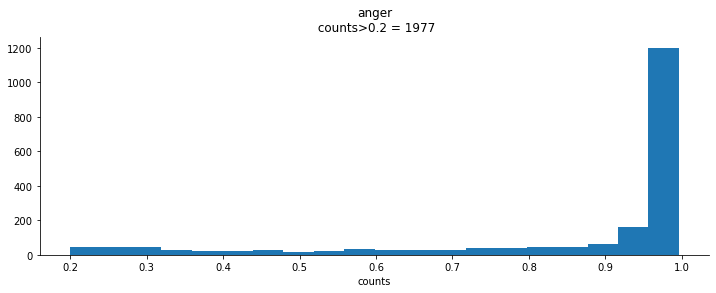

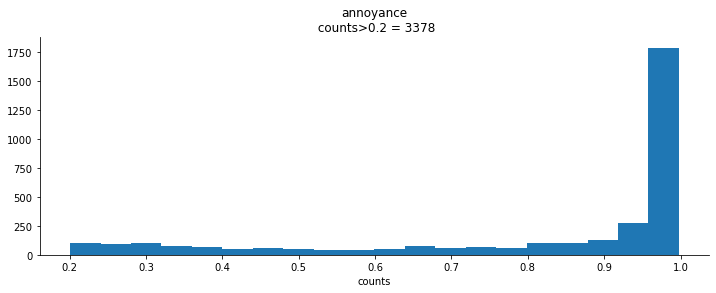

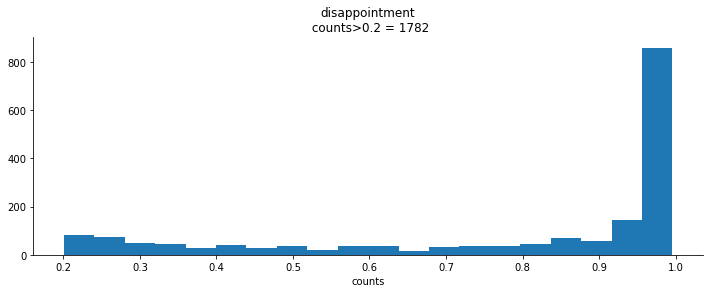

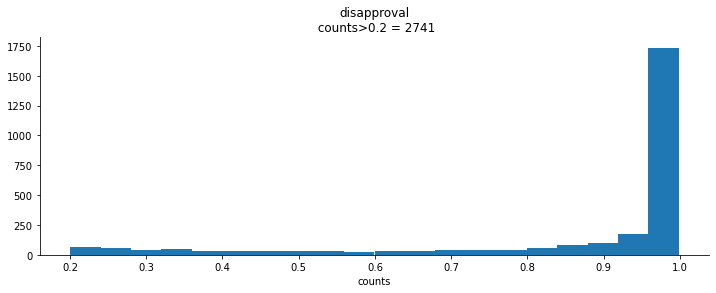

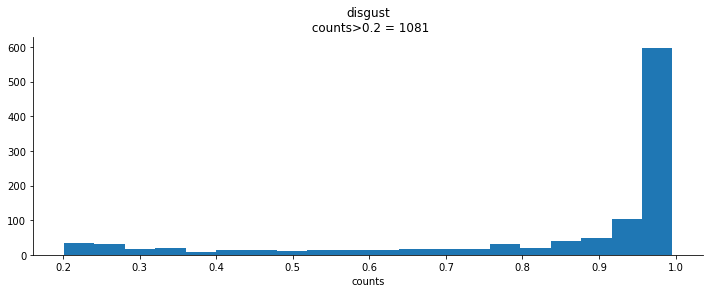

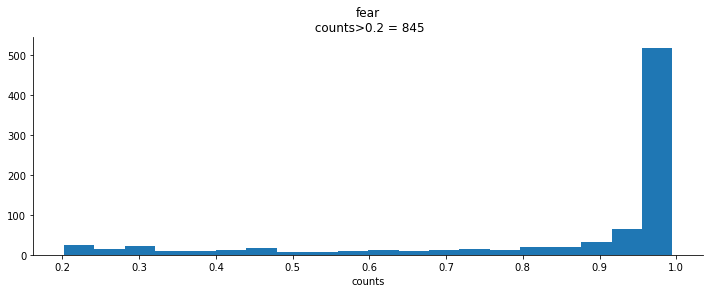

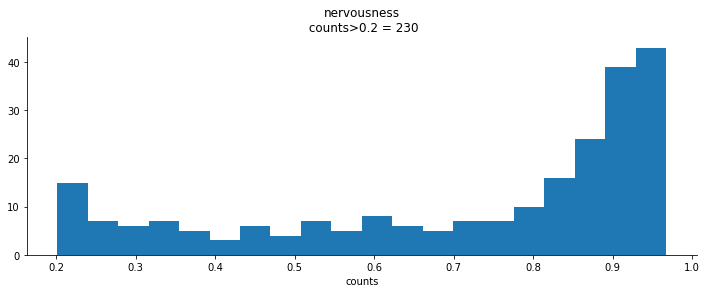

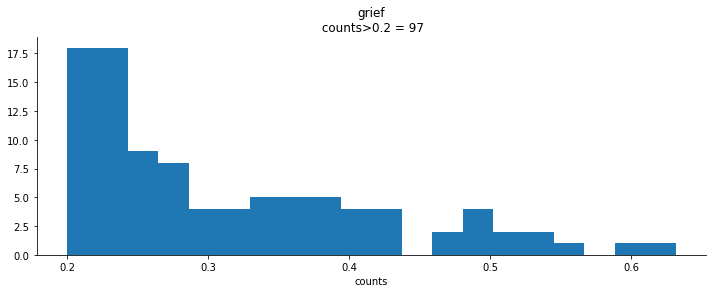

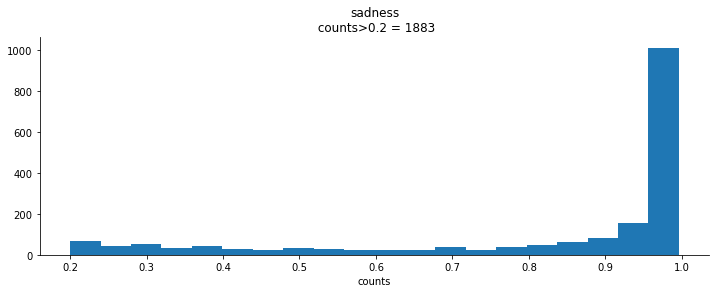

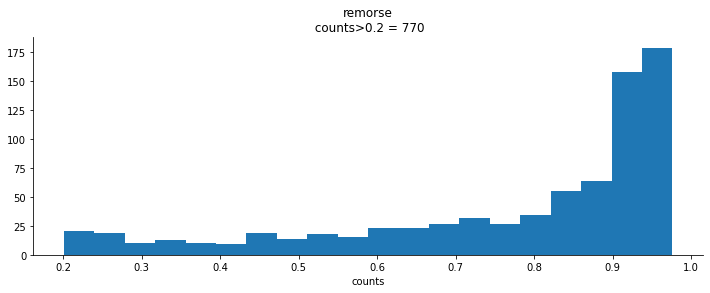

In [323]:
for emotion in neg_emotions:
    
    scores = score_df[emotion].values
    scores = scores[scores>0.2]

    plt.figure(figsize=(12,4))
    plt.title(emotion + '\n counts>0.2 = '+str(len(scores)))
    plt.xlabel('counts')
    #plt.xlim([0.2,1])

    plt.hist(scores,bins=20)
    sns.despine()

##### Emotion Counts: Positive

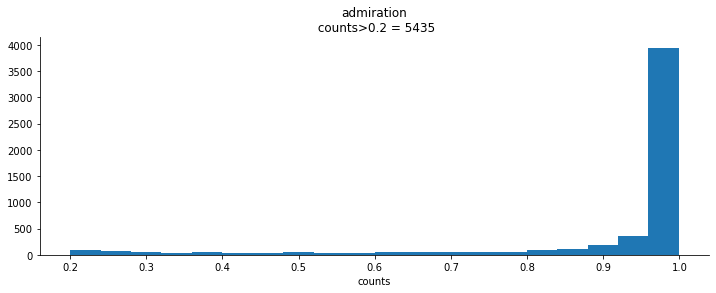

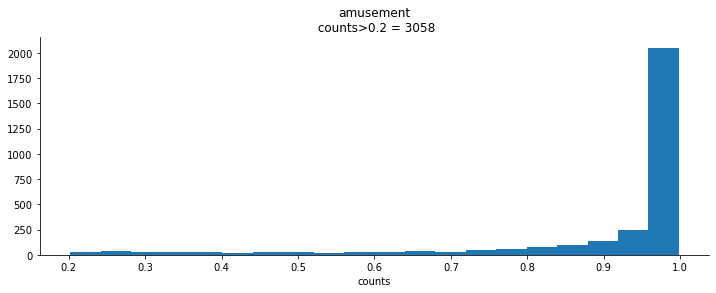

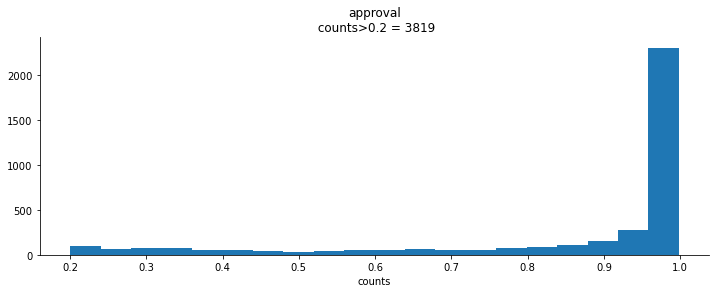

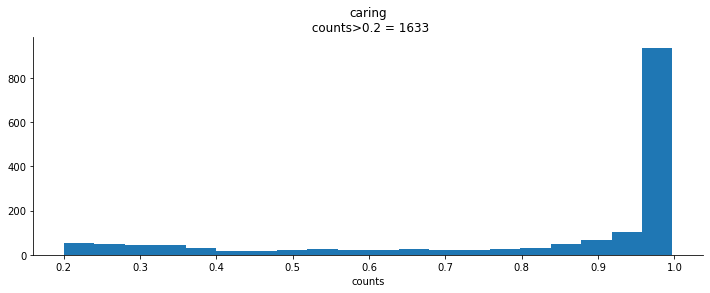

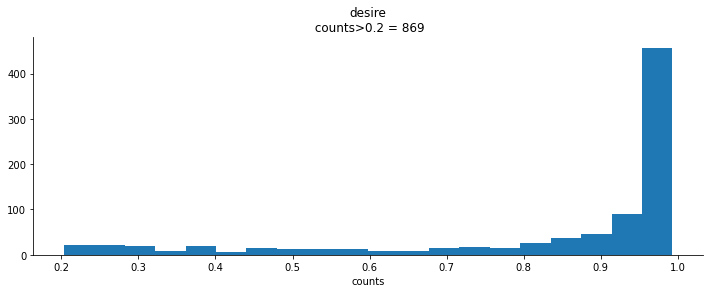

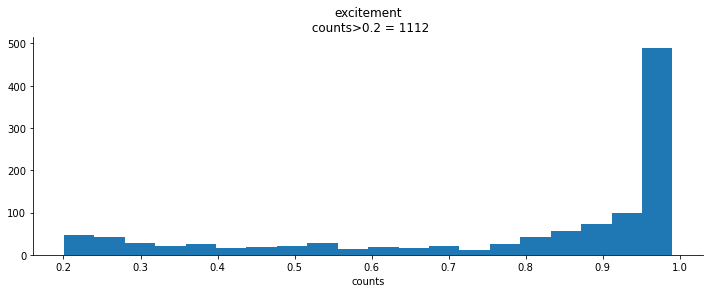

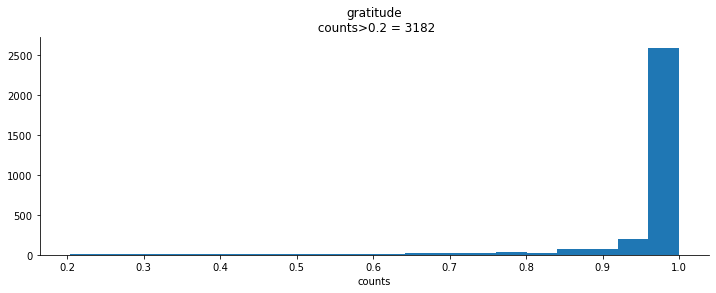

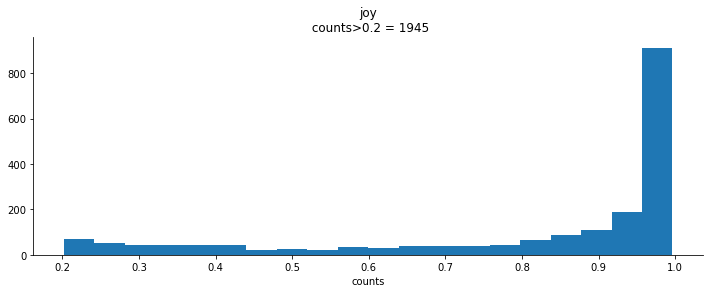

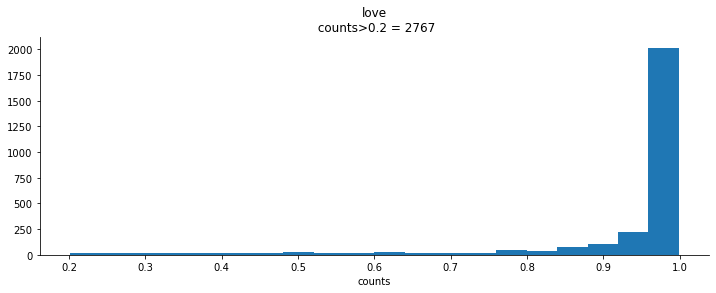

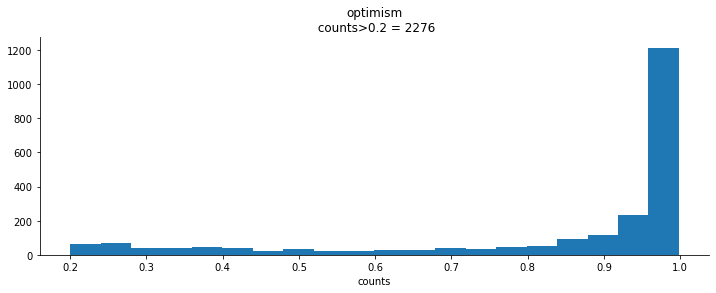

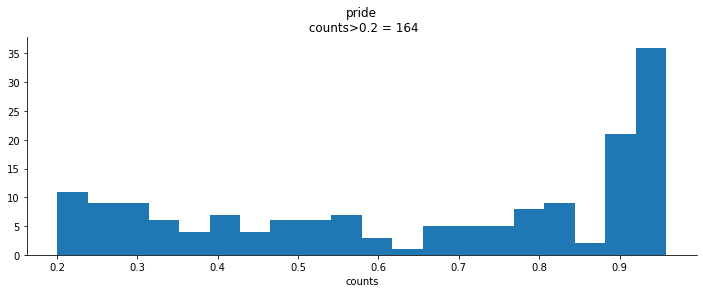

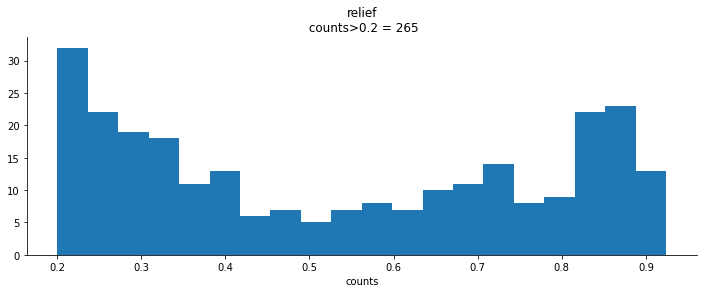

In [324]:
for emotion in pos_emotions:
    
    scores = score_df[emotion].values
    scores = scores[scores>0.2]

    plt.figure(figsize=(12,4))
    plt.title(emotion + '\n counts>0.2 = '+str(len(scores)))
    plt.xlabel('counts')
    #plt.xlim([0.2,1])

    plt.hist(scores,bins=20)
    sns.despine()

##### Sentiment Distribution

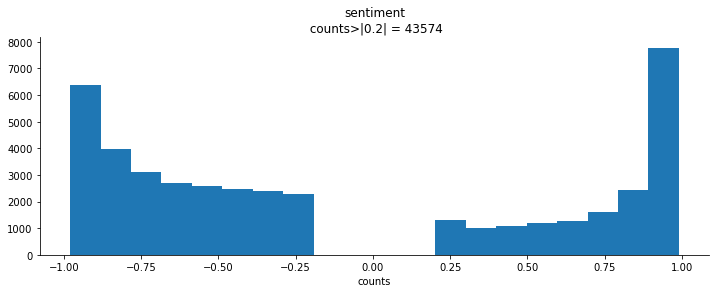

In [325]:
scores = score_df['sentiment'].values
scores = scores[np.abs(scores)>0.2]

plt.figure(figsize=(12,4))
plt.title('sentiment' + '\n counts>|0.2| = '+str(len(scores)))
plt.xlabel('counts')
#plt.xlim([0.2,1])

plt.hist(scores,bins=20)
sns.despine()

#### Shuffling Combined Dataset

In [260]:
filename1='../data/results/single_sentences_IYou_3_emo/cmbnd_ends_w_emotions.txt'
filename2='../data/results/single_sentences_IYou_3_emo/cmbnd_full_generations_w_emotions.txt'
with open(filename1,'r') as f1, open(filename2,'r') as f2:
    lines1=f1.readlines()
    lines2=f2.readlines()

In [265]:
np.random.seed(1)
new_order = np.random.permutation(np.arange(0,len(lines1)))
new_order

array([ 82087,  30936, 101558, ...,   5192,  77708,  98539])

In [267]:
lines1_new = [lines1[i] for i in new_order]
lines2_new = [lines2[i] for i in new_order]

In [281]:
lines1_new[13]

'You had a bike ride on your feet last week, Young added. r=0.062,r_admiration=0.00,r_amusement=0.00,r_anger=0.00,r_annoyance=0.00,r_approval=0.00,r_caring=0.00,r_confusion=0.00,r_curiosity=0.00,r_desire=0.00,r_disappointment=0.00,r_disapproval=0.00,r_disgust=0.00,r_embarrassment=0.00,r_excitement=0.00,r_fear=0.00,r_gratitude=0.00,r_grief=0.00,r_joy=0.00,r_love=0.00,r_nervousness=0.00,r_optimism=0.00,r_pride=0.00,r_realization=0.00,r_relief=0.00,r_remorse=0.00,r_sadness=0.00,r_surprise=0.00,r_neutral=1.00\n'

In [280]:
lines2_new[13]

'You walked my dog to the park. You ate breakfast. You have a math test. You had a bike ride on your feet last week, Young added. r=0.062,r_admiration=0.00,r_amusement=0.00,r_anger=0.00,r_annoyance=0.00,r_approval=0.00,r_caring=0.00,r_confusion=0.00,r_curiosity=0.00,r_desire=0.00,r_disappointment=0.00,r_disapproval=0.00,r_disgust=0.00,r_embarrassment=0.00,r_excitement=0.00,r_fear=0.00,r_gratitude=0.00,r_grief=0.00,r_joy=0.00,r_love=0.00,r_nervousness=0.00,r_optimism=0.00,r_pride=0.00,r_realization=0.00,r_relief=0.00,r_remorse=0.00,r_sadness=0.00,r_surprise=0.00,r_neutral=1.00\n'

In [282]:
filename1='../data/results/single_sentences_IYou_3_emo/cmbnd_ends_w_emotions_shfld.txt'
filename2='../data/results/single_sentences_IYou_3_emo/cmbnd_full_generations_w_emotions_shfld.txt'
with open(filename1,'w') as f1, open(filename2,'w') as f2:
    for line1,line2 in zip(lines1_new,lines2_new):
        f1.write(line1)
        f2.write(line2)

#### Combined Dataset

In [326]:
score_df1 = pd.read_csv('../data/results/single_sentences_IYou_3_emo/go_emotion_df.csv', index_col=0)
score_df2 = pd.read_csv('../data/results/single_sentences_IYou_3_emo/emotion_df.csv', index_col=0)

score_df = pd.concat((score_df1, score_df2))
print(len(score_df))
score_df.head()

126531


full  \
0  My favourite food is anything I didn't have to...   
1  Now if he does off himself, everyone will thin...   
2          WHY THE FUCK IS BAYLESS ISOING. r=-0.91\n   
3             To make her feel threatened. r=-0.68\n   
4                  Dirty Southern Wankers. r=-0.84\n   

                                                 end  sentiment  admiration  \
0  My favourite food is anything I didn't have to...       0.93    0.000291   
1  Now if he does off himself, everyone will thin...      -0.78    0.000241   
2          WHY THE FUCK IS BAYLESS ISOING. r=-0.91\n      -0.91    0.003007   
3             To make her feel threatened. r=-0.68\n      -0.68    0.001657   
4                  Dirty Southern Wankers. r=-0.84\n      -0.84    0.002145   

   amusement     anger  annoyance  approval    caring  confusion  ...  \
0   0.000649  0.000456   0.001708  0.001112  0.000575   0.000376  ...   
1   0.002470  0.000239   0.001511  0.000913  0.000263   0.000468  ...   
2   0.000301  0.986034   0.012101  0.000664  0.000712   0.001533  ...   
3   0.000843  0.000864   0.001451  0.001271  0.014837   0.003317  ...   
4   0.001882  0.006127   0.995474  0.004614  0.000749   0.000922  ...   

       love  nervousness  optimism     pride  realization    relief   remorse  \
0  0.000898     0.000087  0.000660  0.000181     0.000461  0.000120  0.000142   
1  0.000096     0.000072  0.002516  0.000216     0.000778  0.000197  0.000179   
2  0.001738     0.000124  0.000998  0.001091     0.001670  0.000131  0.001057   
3  0.000503     0.054697  0.004122  0.000364     0.001240  0.000542  0.000573   
4  0.000207     0.000335  0.004176  0.001209     0.002228  0.001700  0.000307   

    sadness  surprise   neutral  
0  0.000423  0.000103  0.999059  
1  0.000368  0.000465  0.998842  
2  0.001121  0.004092  0.034706  
3  0.003721  0.001853  0.017065  
4  0.000810  0.000626  0.016573  

[5 rows x 31 columns]

##### Correlating Negative Emotions with Sentiment

In [285]:
neg_emotions = ['anger', 'annoyance', 'disappointment', 'disapproval',
                'disgust', 'fear', 'nervousness','grief', 'sadness','remorse']

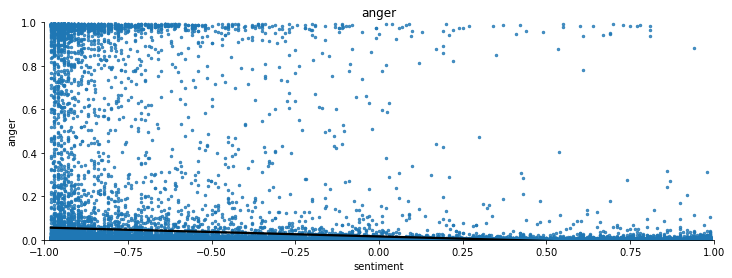

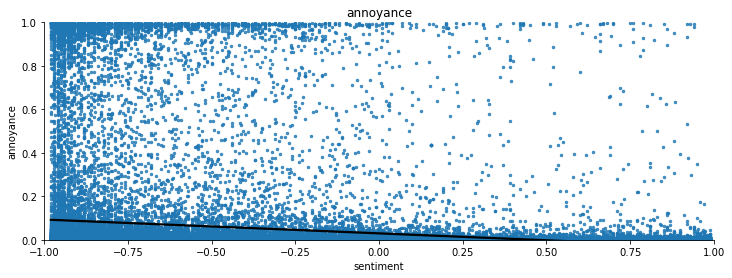

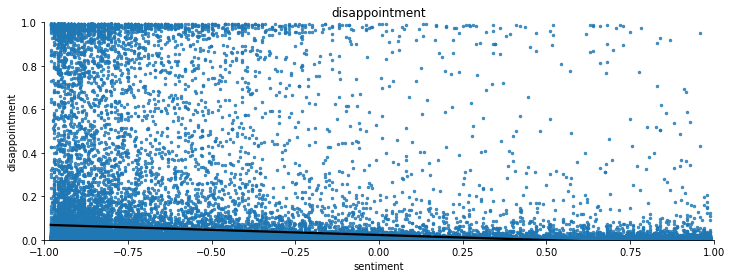

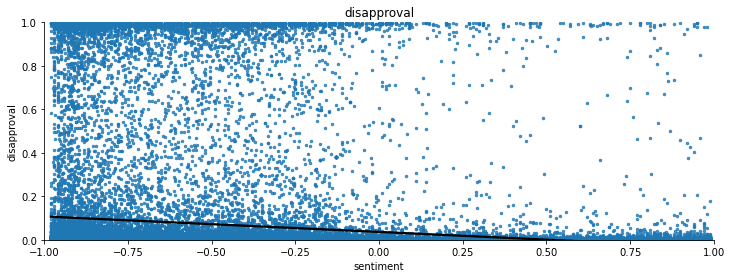

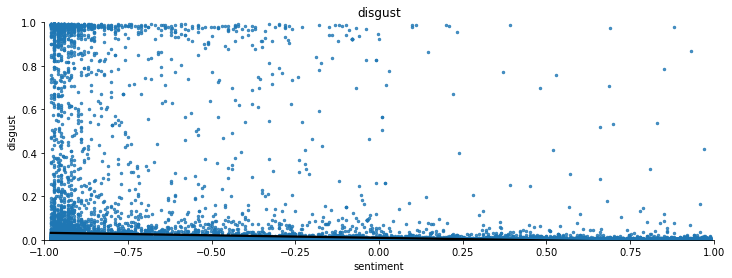

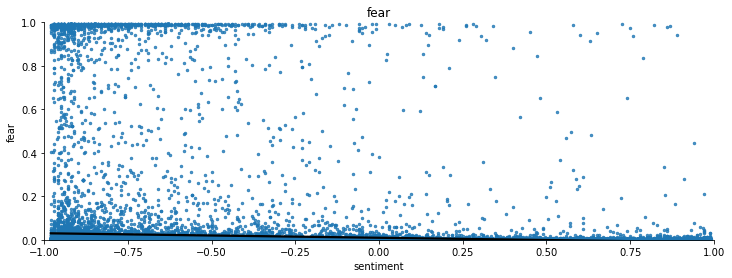

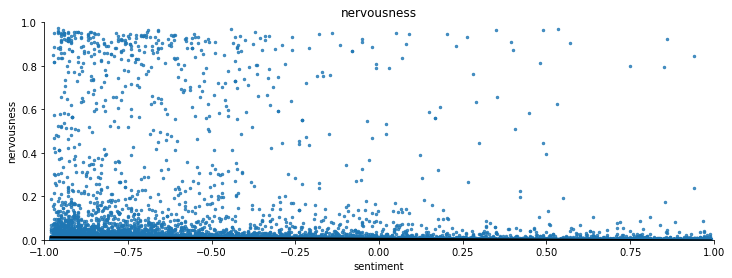

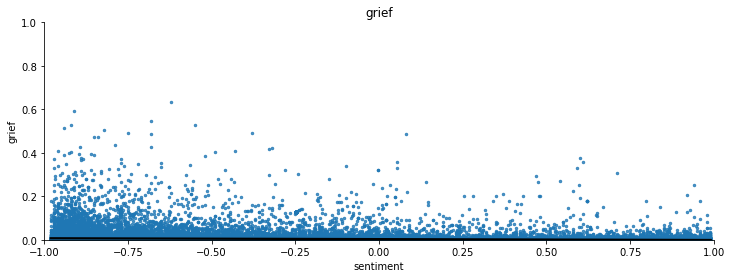

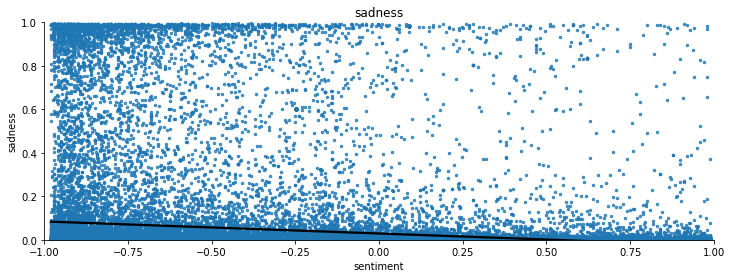

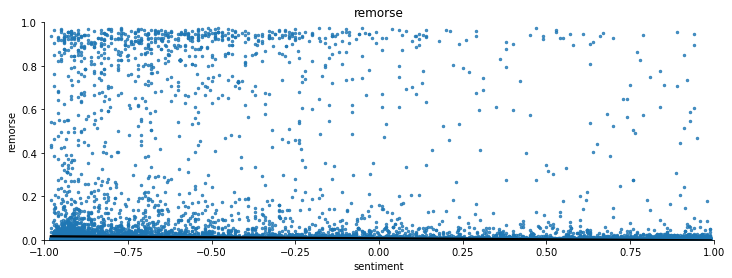

In [286]:
for emotion in neg_emotions:
    
    plt.figure(figsize=(12,4))
    plt.title(emotion)
    plt.ylabel(emotion)
    plt.xlabel('sentiment')
    plt.xlim([-1,1])
    plt.ylim([0,1])
    sns.regplot(x='sentiment', y=emotion, scatter_kws={'s': 6}, 
                line_kws={'color':'k'}, data=score_df)
    sns.despine()

##### Correlating Positive Emotions with Sentiment

In [287]:
pos_emotions = ['admiration','amusement','approval',
 'caring','desire','excitement','gratitude', 'joy','love','optimism',
 'pride','relief']

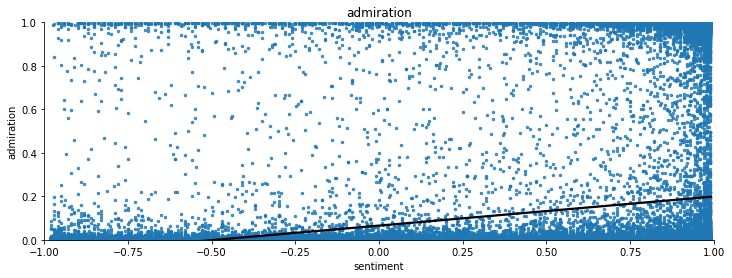

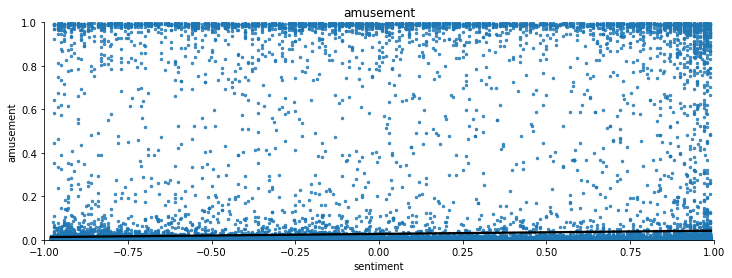

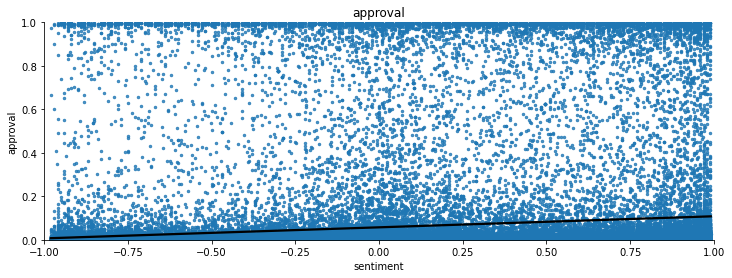

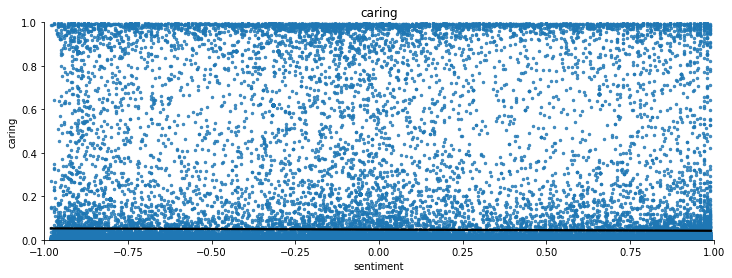

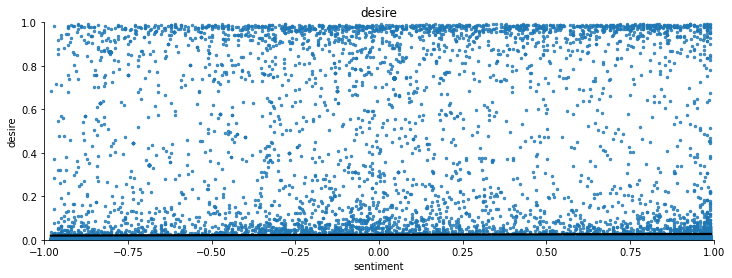

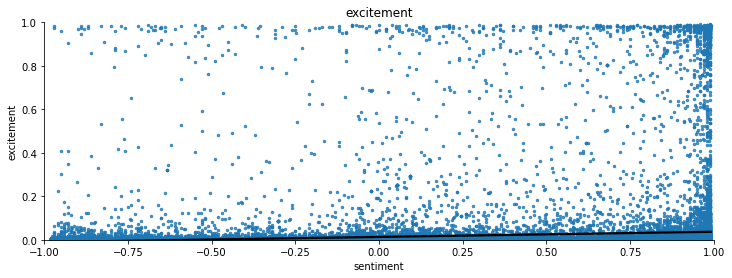

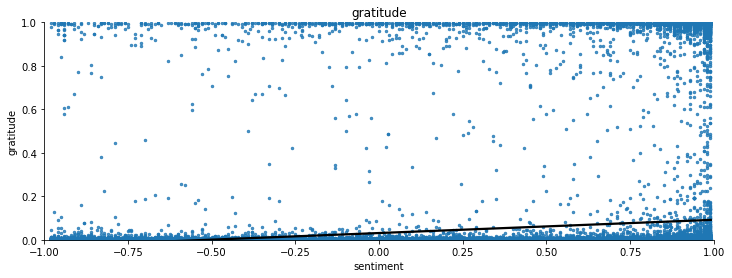

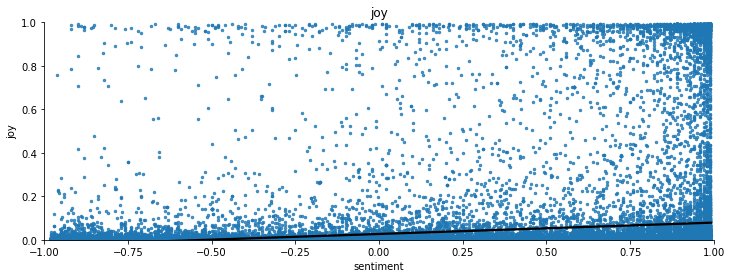

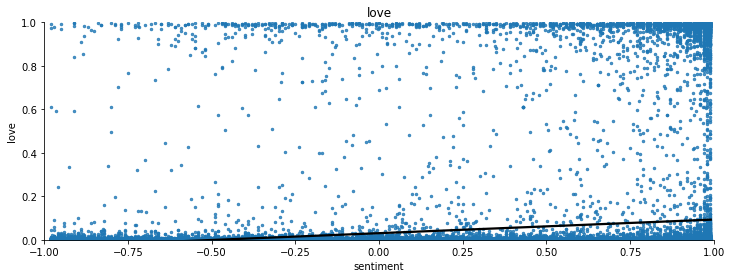

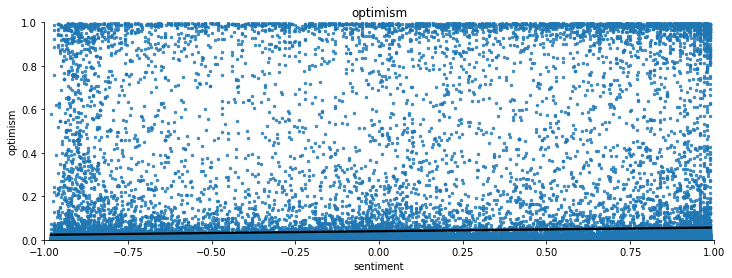

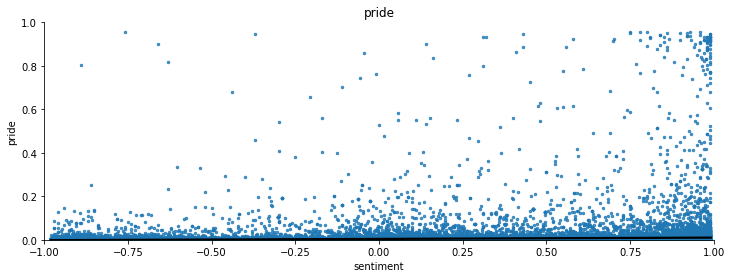

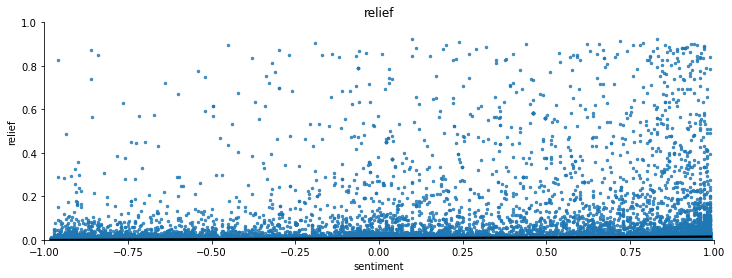

In [288]:
for emotion in pos_emotions:
    plt.figure(figsize=(12,4))
    plt.title(emotion)
    plt.ylabel(emotion)
    plt.xlabel('sentiment')
    plt.xlim([-1,1])
    plt.ylim([0,1])
    sns.regplot(x='sentiment', y=emotion, scatter_kws={'s': 6}, 
                line_kws={'color':'k'}, data=score_df)
    sns.despine()

##### Top Examples: Negative

In [289]:
%%capture cap --no-stderr

top = 10
for emotion in neg_emotions:
    df_sorted = score_df.sort_values(by=emotion, ascending=False)
    scores = df_sorted[emotion].values
    texts = df_sorted['end'].values
    top_texts = [t.split('r=')[0] for t in texts[0:top]]
    
    print(emotion)
    print('---')
    for text in top_texts:
        print(text)
    print(scores[0:top])
    print(' ')

In [290]:
with open('../data/results/single_sentences_IYou_3_emo/cmbnd_neg_emotion_examples.txt','w') as f:
    f.write(cap.stdout)

In [291]:
cap.show()

anger
---
Your comment is completely irrelevant and you're trolling me in order for you to cry and whine about Detroit. Get out of here. 
Lies, damn lies and statistics. 
I was freaking out watching this. WTF are the parents!? 
> so much misinformation > No hazing or violence tolerated whatsoever Lmao wut. 
I was restless, bored, drunk, impatient, and angry all at the same time. 
I was raised solo parent so it was more of an angry hushed whisper when they thought I was in the other room. 
I know a dozen local school administrators. What the hell are you talking about? 
This comment is fucking cringey lol why the fuck do you talk like that. 
[NAME] and his supporters are the dumbest humans in the fucking galaxy. They should be locked up for their own safety. 
A fucking power outage during a hurricane and your car is fucked. 
[0.9959896  0.99564254 0.99559504 0.995141   0.9951089  0.99440974
 0.99439985 0.99439645 0.99430674 0.99429613]
 
annoyance
---
I’m just shitposting dude. In the s

##### Top Examples: Positive

In [292]:
%%capture cap --no-stderr

top = 10
for emotion in pos_emotions:
    df_sorted = score_df.sort_values(by=emotion, ascending=False)
    scores = df_sorted[emotion].values
    texts = df_sorted['end'].values
    top_texts = [t.split('r=')[0] for t in texts[0:top]]
    
    print(emotion)
    print('---')
    for text in top_texts:
        print(text)
    print(scores[0:top])
    print(' ')

In [293]:
with open('../data/results/single_sentences_IYou_3_emo/cmbnd_pos_emotion_examples.txt','w') as f:
    f.write(cap.stdout)

In [294]:
cap.show()

admiration
---
This is badass. I'd love to see it placed over war pigs. Amazing work OP. 
This was pretty interesting. Creative, disturbing and very original. I honestly thought Hereditary was pretty bad, but I enjoyed this. Thanks for sharing. 
I love all things supportive of books and spreading their wonderfulness. 
I love my Red Wings because they're incredibly stylish and I still feel like I could stomp a mudhole in somebody's ass. 
very well put. wow i love that man, i’d play a mean game of chess w him. 
This guy used to be so good. I looked forward to his comics every week. Now, I couldn't care less about him. Complete economic illiterate. 
Look at it this way: it's the Millennium Falcon, everyone still loves it. It's part of it's charm. 
Wow I guess alcoholics and drug addicts done exist either! and everyone always makes logical great decisions!! 
Y'all just introverted. It's cool to be akward we extroverts, at least smart ones, love you anyway. 
Agree. Not a perfect coach but p

##### Emotion Counts: Negative

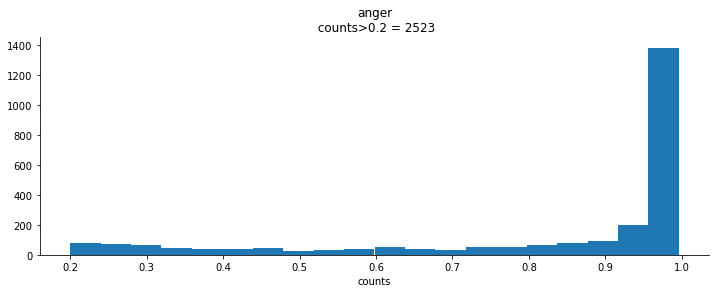

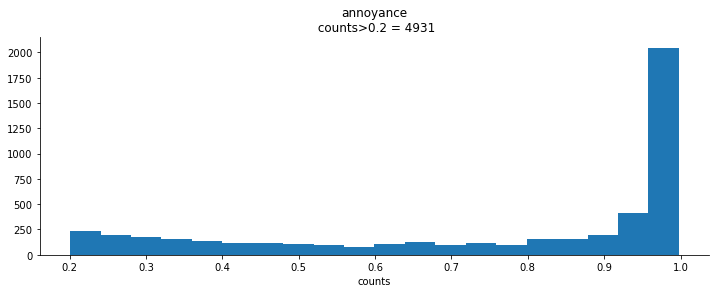

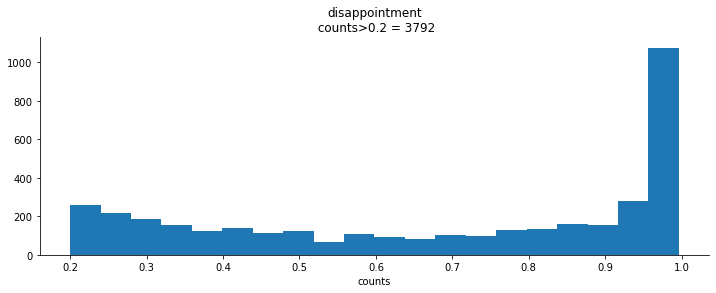

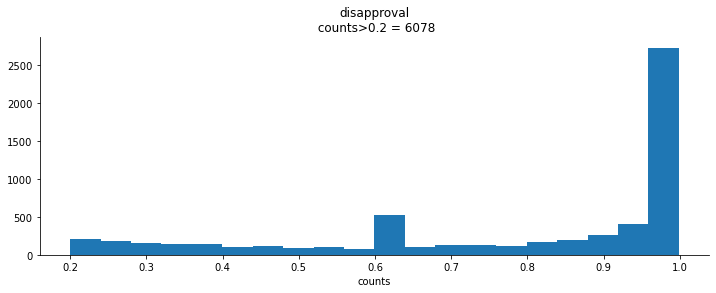

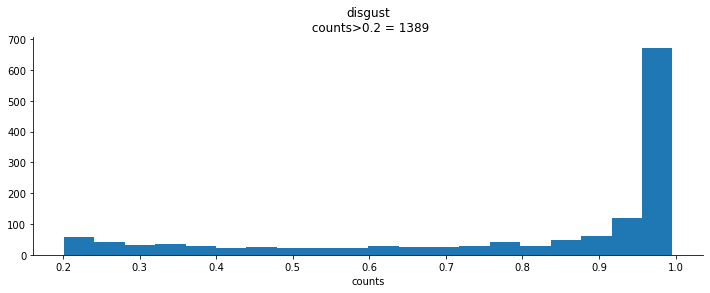

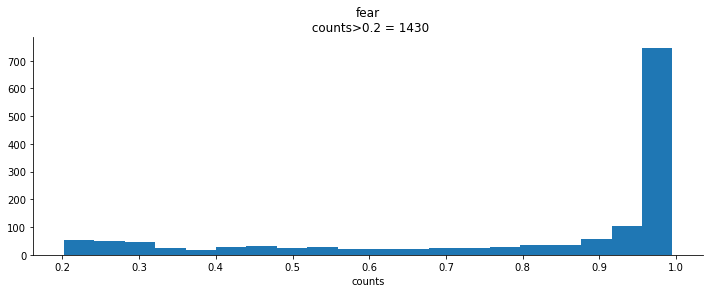

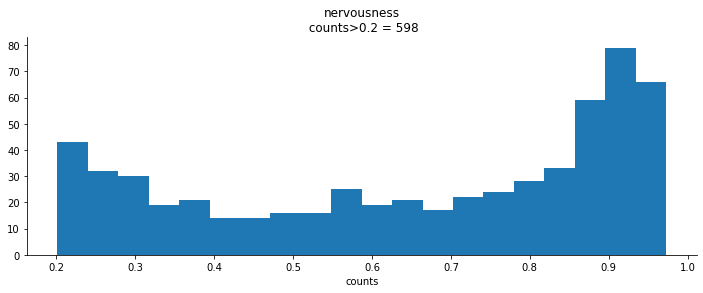

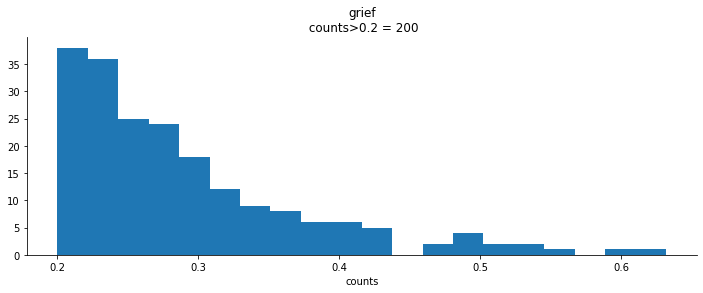

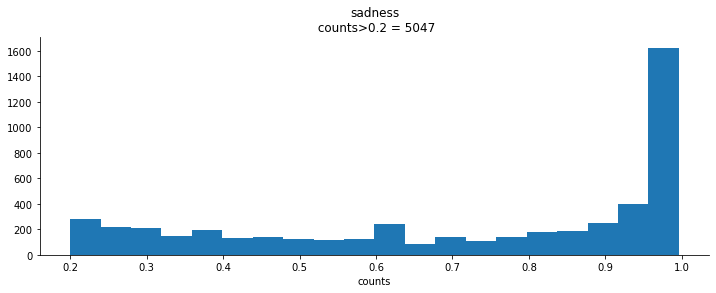

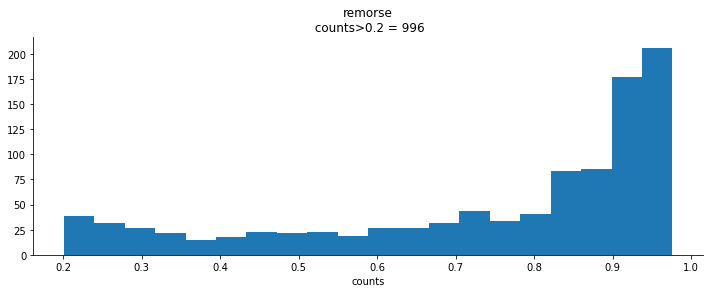

In [295]:
for emotion in neg_emotions:
    
    scores = score_df[emotion].values
    scores = scores[scores>0.2]

    plt.figure(figsize=(12,4))
    plt.title(emotion + '\n counts>0.2 = '+str(len(scores)))
    plt.xlabel('counts')
    #plt.xlim([0.2,1])

    plt.hist(scores,bins=20)
    sns.despine()

##### Emotion Counts: Positive

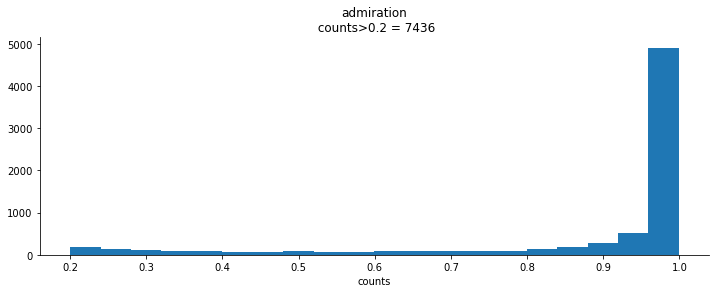

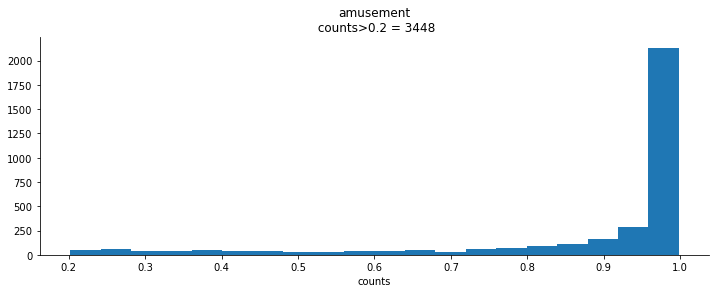

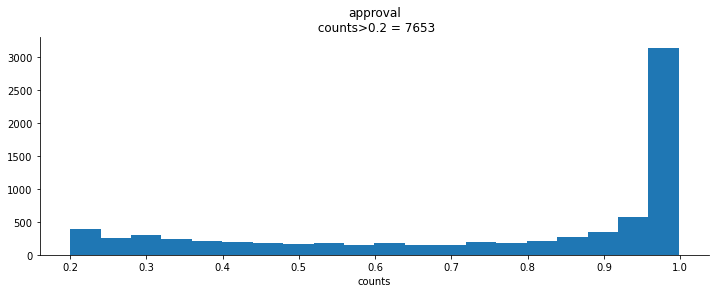

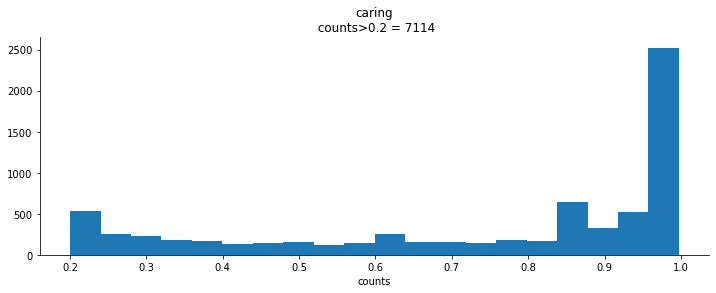

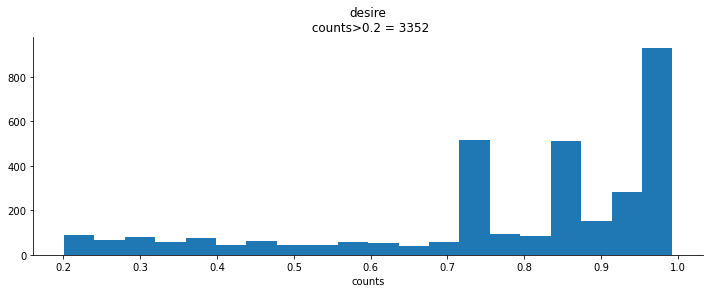

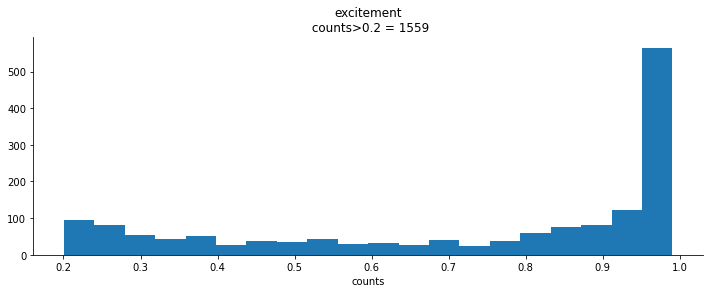

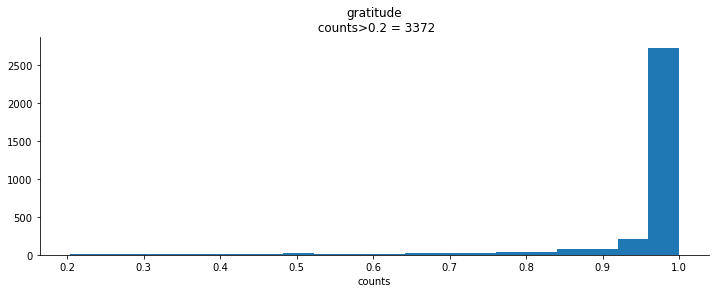

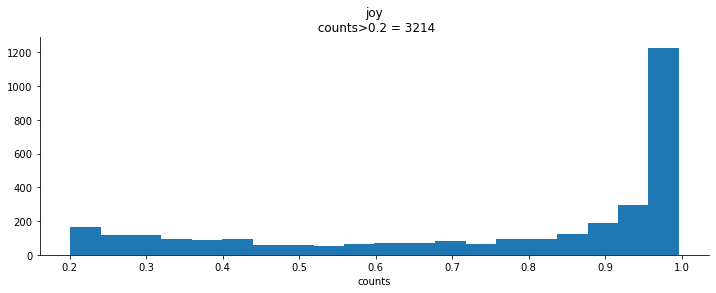

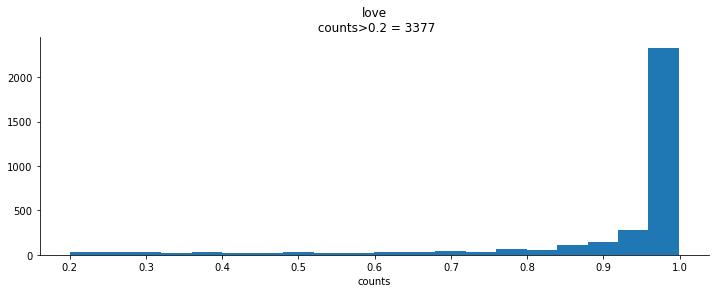

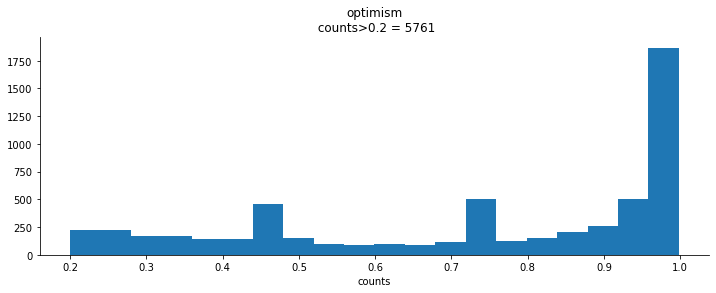

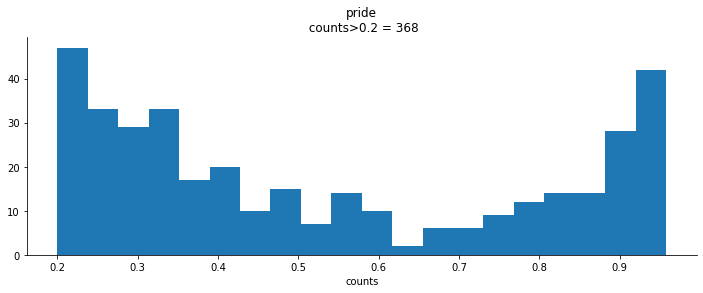

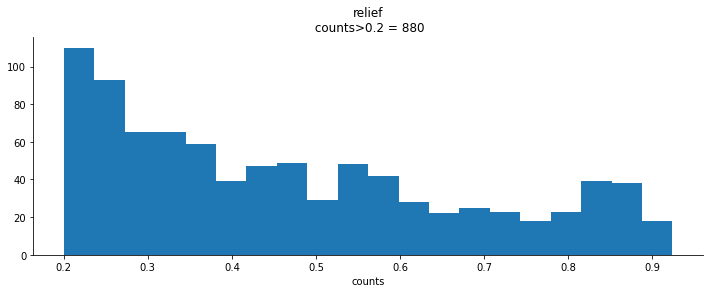

In [296]:
for emotion in pos_emotions:
    
    scores = score_df[emotion].values
    scores = scores[scores>0.2]

    plt.figure(figsize=(12,4))
    plt.title(emotion + '\n counts>0.2 = '+str(len(scores)))
    plt.xlabel('counts')
    #plt.xlim([0.2,1])

    plt.hist(scores,bins=20)
    sns.despine()

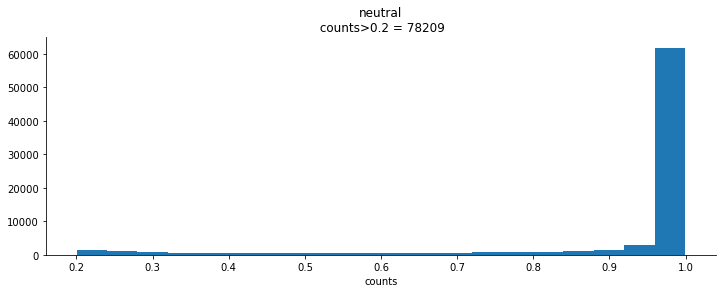

In [327]:
for emotion in ['neutral']:
    
    scores = score_df[emotion].values
    scores = scores[scores>0.2]

    plt.figure(figsize=(12,4))
    plt.title(emotion + '\n counts>0.2 = '+str(len(scores)))
    plt.xlabel('counts')
    #plt.xlim([0.2,1])

    plt.hist(scores,bins=20)
    sns.despine()

##### Sentiment Distribution

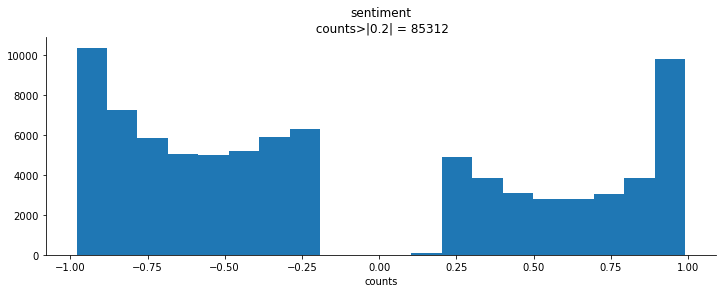

In [297]:
scores = score_df['sentiment'].values
scores = scores[np.abs(scores)>0.2]

plt.figure(figsize=(12,4))
plt.title('sentiment' + '\n counts>|0.2| = '+str(len(scores)))
plt.xlabel('counts')
#plt.xlim([0.2,1])

plt.hist(scores,bins=20)
sns.despine()